# ...... Predicting the Fraud in auto insurance claims & Pattern extraction.....

# Problem Statement :
The main purpose of this  is to come up with a model to be used to find out if a certain
insurance claim made is a fraud or not. The model will be designed after testing multiple
algorithms to come up with the best model that can detect if a claim is fraudulent or not. This is
aimed at the insurance companies as a pitch to come up with a more tailored model for their liking
to their own systems. The model should be simple enough to calculate big datasets, yet complex
enough to have a decent successful percentile


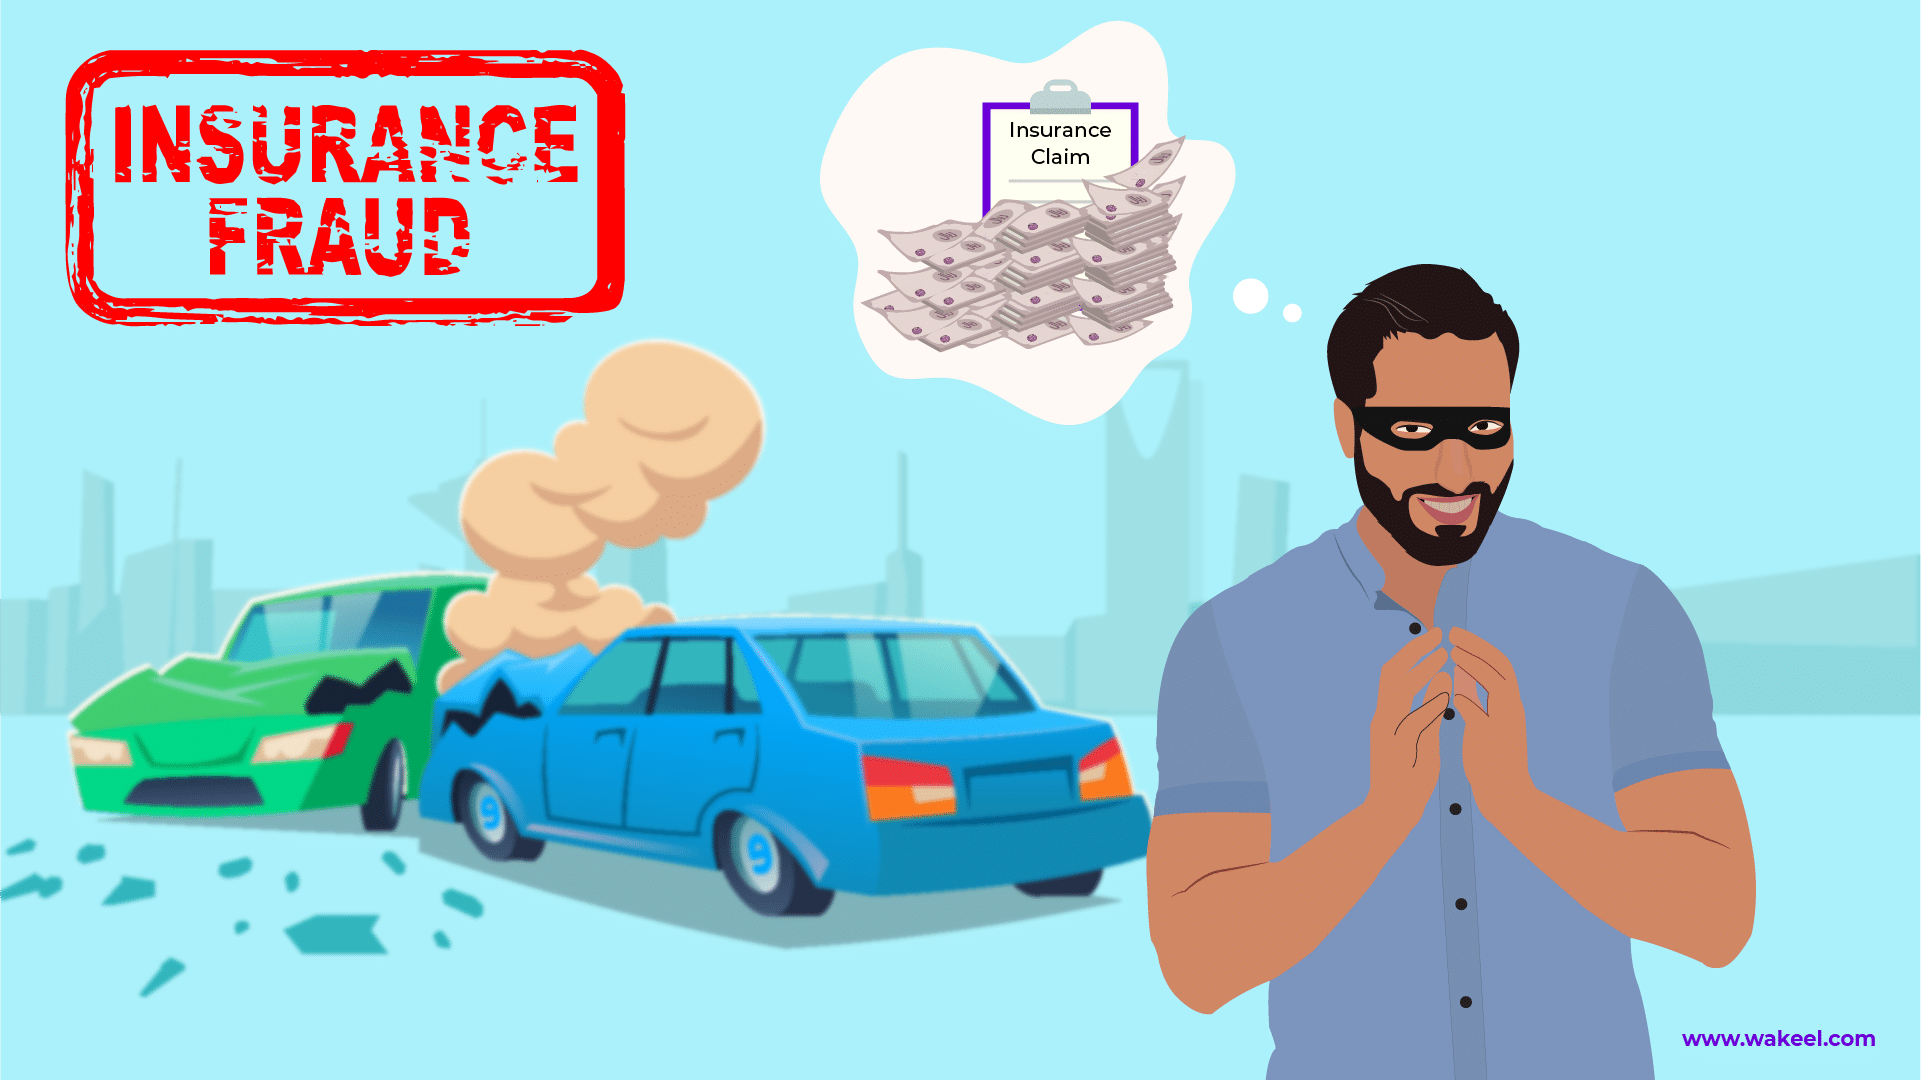

In [1]:
from IPython.display import Image
Image("Insurance-Fraud_EN-Blog.png")

# 1. Reading Libraries

In [3]:
import pandas as pd
import csv
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
# for some basic operations
import joypy
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates
# for interactive visualizations
import plotly
import plotly.offline as py
import plotly.graph_objs as go


# 2. Reading the dataset

In [4]:
train_claim=pd.read_csv('Train_Claim.csv',na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])#Reading The Train_Claim Dataset

In [5]:
train_demo=pd.read_csv('Train_demographics.csv',na_values=['NA'])#Reading The Train_demo 

In [6]:
train_vehicle=pd.read_csv('Train_vehicle.csv',na_values=['???'])#Reading THe Train_vehicle

In [7]:
train_policy=pd.read_csv('Train_policy.csv',na_values=["-1","MISSINGVAL","NA"])#Reading the train_policy

In [8]:
target=pd.read_csv('Traindata_with_Target.csv')#Tragets

# 3.Merging the Train datasets

In [9]:
VehicleID=pd.DataFrame(columns=["CustomerID","VehicleID"])#Creating the empty with the columns of CustomerID And VehicleID
VehicleModel=pd.DataFrame(columns=["CustomerID","VehicleModel"])#Creating the empty with the columns of CustomerID And VehicleModel
VehicleMake=pd.DataFrame(columns=["CustomerID","VehicleMake"])#Creating the empty with the columns of CustomerID And VehicleMake
VehicleYOM=pd.DataFrame(columns=["CustomerID","VehicleYOM"])#Creating the empty with the columns of CustomerID And VehicleYom
for i in train_vehicle['VehicleAttribute'].unique():
    emptydf=train_vehicle[train_vehicle["VehicleAttribute"]==i][['CustomerID','VehicleAttributeDetails']]
    emptydf.columns=["CustomerID",i]
    if(i=="VehicleID"):
        VehicleID=VehicleID.append(emptydf) 
    elif(i=="VehicleModel"):
        VehicleModel=VehicleModel.append(emptydf)
    elif(i=="VehicleMake"):
        VehicleMake=VehicleMake.append(emptydf)
    else:
        VehicleYOM=VehicleYOM.append(emptydf)

In [10]:
train_vehicle=pd.merge(VehicleID,pd.merge(VehicleModel,pd.merge(VehicleMake,VehicleYOM)))#Merge the above 4 data frames 

In [11]:
Merge= pd.merge(train_claim,pd.merge(train_demo,pd.merge(train_policy,pd.merge(train_vehicle,target))))#mergeing the all csv files


In [12]:
Merge.to_csv('Fraudlent_claims.csv',index=None)

# 4. Understanding the Dataset

In [12]:
Merge.to_csv('Fraudlent_claims.csv',index=None)

In [13]:
Merge

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0      Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1      Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2      Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3      Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4      Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   
...          ...            ...                       ...              ...   
28831   Cust9993     2015-01-24             Vehicle Theft              NaN   
28832   Cust9994     2015-02-09  Single Vehicle Collision  Front Collision   
28833   Cust9996     2015-01-28  Single Vehicle Collision   Rear Collision   
28834   Cust9997     2015-01-28  Single Vehicle Collision   Rear Collision   
28835   Cust9999     2015-01-13  Single Vehicle Collision  Front Collision   

      SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0             Total Loss               Police        State7        City1   
1             Total Loss               Police        State7        City5   
2           Minor Damage                Other        State8        City6   
3           Minor Damage                Other        State9        City6   
4           Minor Damage                 Fire        State8        City6   
...                  ...                  ...           ...          ...   
28831     Trivial Damage               Police        State9        City4   
28832       Minor Damage                 Fire        State8        City3   
28833       Minor Damage                 Fire        State9        City7   
28834       Minor Damage            Ambulance        State9        City3   
28835         Total Loss                Other        State8        City3   

      IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0       Location 1311          17.0  ...                     100/300   
1       Location 1311          10.0  ...                     100/300   
2       Location 2081          22.0  ...                    500/1000   
3       Location 2081          22.0  ...                    500/1000   
4       Location 1695          10.0  ...                     100/300   
...               ...           ...  ...                         ...   
28831   Location 1890           3.0  ...                    500/1000   
28832   Location 2097          17.0  ...                     100/300   
28833   Location 1452           1.0  ...                     250/500   
28834   Location 1876           1.0  ...                     250/500   
28835   Location 1874           9.0  ...                    500/1000   

      Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit  \
0                  1000              1632.73              0   
1                  1000              1255.19              0   
2                   617              1373.38              0   
3                   722              1337.60              0   
4                   500              1353.73        4279863   
...                 ...                  ...            ...   
28831               655              1276.01              0   
28832              1089              1273.38              0   
28833               787              1380.92        3448735   
28834               780              1389.29        3364301   
28835              2000               928.43        2909175   

      InsuredRelationship     VehicleID  VehicleModel  VehicleMake  \
0           not-in-family  Vehicle26917            A5         Audi   
1           not-in-family  Vehicle15893            A5         Audi   
2                    wife   Vehicle5152         Jetta   Volkswagen   
3               own-child  Vehicle37363         Jetta   Volkswagen   
4               unmarried  Vehicle28633           CRV       Toyota   
...                   ...           ...           ...          ...   
28831           unmarried  Vehicle13568     

### Display the head of dataset

In [14]:
Merge.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0   Location 1311          17.0  ...                     100/300   
1   Location 1311          10.0  ...                     100/300   
2   Location 2081          22.0  ...                    500/1000   
3   Location 2081          22.0  ...                    500/1000   
4   Location 1695          10.0  ...                     100/300   

  Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit InsuredRelationship  \
0              1000              1632.73              0       not-in-family   
1              1000              1255.19              0       not-in-family   
2               617              1373.38              0                wife   
3               722              1337.60              0           own-child   
4               500              1353.73        4279863           unmarried   

      VehicleID  VehicleModel  VehicleMake  VehicleYOM  ReportedFraud  
0  Vehicle26917            A5         Audi        2008              N  
1  Vehicle15893            A5         Audi        2006              N  
2   Vehicle5152         Jetta   Volkswagen        1999              N  
3  Vehicle37363         Jetta   Volkswagen        2003              N  
4  Vehicle28633           CRV       Toyota        2010              N  

[5 rows x 42 columns]

### Display Tail of the Dataset

In [15]:
# display the last 5 rows of the dataframe
Merge.tail()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
28831   Cust9993     2015-01-24             Vehicle Theft              NaN   
28832   Cust9994     2015-02-09  Single Vehicle Collision  Front Collision   
28833   Cust9996     2015-01-28  Single Vehicle Collision   Rear Collision   
28834   Cust9997     2015-01-28  Single Vehicle Collision   Rear Collision   
28835   Cust9999     2015-01-13  Single Vehicle Collision  Front Collision   

      SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
28831     Trivial Damage               Police        State9        City4   
28832       Minor Damage                 Fire        State8        City3   
28833       Minor Damage                 Fire        State9        City7   
28834       Minor Damage            Ambulance        State9        City3   
28835         Total Loss                Other        State8        City3   

      IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
28831   Location 1890           3.0  ...                    500/1000   
28832   Location 2097          17.0  ...                     100/300   
28833   Location 1452           1.0  ...                     250/500   
28834   Location 1876           1.0  ...                     250/500   
28835   Location 1874           9.0  ...                    500/1000   

      Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit  \
28831               655              1276.01              0   
28832              1089              1273.38              0   
28833               787              1380.92        3448735   
28834               780              1389.29        3364301   
28835              2000               928.43        2909175   

      InsuredRelationship     VehicleID  VehicleModel  VehicleMake  \
28831           unmarried  Vehicle13568       Impreza       Suburu   
28832           unmarried  Vehicle19810      Wrangler         Jeep   
28833           own-child   Vehicle3339        Legacy       Suburu   
28834       not-in-family  Vehicle10240     Forrestor       Suburu   
28835             husband  Vehicle39163          E400       Suburu   

       VehicleYOM  ReportedFraud  
28831        2007              N  
28832        2003              N  
28833        2004              N  
28834        2004              N  
28835        2007              N  

[5 rows x 42 columns]

### Display Dtypes of the dataset

In [16]:
with open('Fraudlent_claims.csv') as f:
    reader = csv.reader(f)
    header_columns = next(reader)
    column_datatypes = [set() for _ in header_columns]

    for row in reader:
        for i, column in enumerate(row):
            try:
                float(column)
                column_datatypes[i].add(float)
            except ValueError:
                column_datatypes[i].add(str)

    for column_name, datatype_set in zip(header_columns, column_datatypes):
        if len(datatype_set) == 1:
            datatype = datatype_set.pop()
            print(f"{column_name}: {datatype.__name__}")
        else:
            print(f"{column_name}: Mixed datatypes")



CustomerID: str
DateOfIncident: str
TypeOfIncident: str
TypeOfCollission: str
SeverityOfIncident: str
AuthoritiesContacted: str
IncidentState: str
IncidentCity: str
IncidentAddress: str
IncidentTime: Mixed datatypes
NumberOfVehicles: float
PropertyDamage: str
BodilyInjuries: float
Witnesses: Mixed datatypes
PoliceReport: str
AmountOfTotalClaim: Mixed datatypes
AmountOfInjuryClaim: float
AmountOfPropertyClaim: float
AmountOfVehicleDamage: float
InsuredAge: float
InsuredZipCode: float
InsuredGender: str
InsuredEducationLevel: str
InsuredOccupation: str
InsuredHobbies: str
CapitalGains: float
CapitalLoss: float
Country: str
InsurancePolicyNumber: float
CustomerLoyaltyPeriod: float
DateOfPolicyCoverage: str
InsurancePolicyState: str
Policy_CombinedSingleLimit: str
Policy_Deductible: float
PolicyAnnualPremium: Mixed datatypes
UmbrellaLimit: float
InsuredRelationship: str
VehicleID: str
VehicleModel: Mixed datatypes
VehicleMake: str
VehicleYOM: float
ReportedFraud: str


### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [17]:
# Get the shape of the dataset
print(Merge.shape)

(28836, 42)


### Descriptive Statistics

In [18]:
Merge.describe().T# to get the summary stats

count           mean           std         min  \
IncidentTime           28805.0      11.764069  6.148869e+00        0.00   
NumberOfVehicles       28836.0       1.823207  9.800987e-01        1.00   
BodilyInjuries         28836.0       0.985782  7.847641e-01        0.00   
Witnesses              28790.0       1.488260  1.040790e+00        0.00   
AmountOfTotalClaim     28786.0   52308.545473  2.510117e+04      150.00   
AmountOfInjuryClaim    28836.0    7337.118428  4.427639e+03        0.00   
AmountOfPropertyClaim  28836.0    7283.870197  4.375843e+03        0.00   
AmountOfVehicleDamage  28836.0   37687.129387  1.797705e+04      109.00   
InsuredAge             28836.0      38.815370  7.996377e+00       19.00   
InsuredZipCode         28836.0  502436.579068  7.225087e+04   430104.00   
CapitalGains           28836.0   23066.569566  2.763781e+04        0.00   
CapitalLoss            28836.0  -24940.612429  2.791321e+04  -111100.00   
InsurancePolicyNumber  28836.0  129312.517097  1.111406e+04   110122.00   
CustomerLoyaltyPeriod  28836.0     203.067867  9.993295e+01        1.00   
Policy_Deductible      28836.0    1114.282529  5.466328e+02      500.00   
PolicyAnnualPremium    28695.0    1261.702646  2.053852e+02      436.28   
UmbrellaLimit          28836.0  983668.034436  1.969282e+06 -1000000.00   

                              25%        50%        75%          max  
IncidentTime                6.000      12.00      17.00        23.00  
NumberOfVehicles            1.000       1.00       3.00         4.00  
BodilyInjuries              0.000       1.00       2.00         2.00  
Witnesses                   1.000       1.00       2.00         3.00  
AmountOfTotalClaim      44643.750   58360.00   68982.75    114920.00  
AmountOfInjuryClaim      4743.750    7147.00   10571.25     21450.00  
AmountOfPropertyClaim    4862.000    7051.00   10327.00     23670.00  
AmountOfVehicleDamage   32193.250   42457.50   49535.75     79560.00  
InsuredAge                 33.000      38.00      44.00        64.00  
InsuredZipCode         448603.000  466691.00  603848.00    620962.00  
CapitalGains                0.000       0.00   49000.00    100500.00  
CapitalLoss            -50000.000       0.00       0.00         0.00  
InsurancePolicyNumber  119698.750  129278.50  138933.25    148619.00  
CustomerLoyaltyPeriod     126.000     199.00     267.00       479.00  
Policy_Deductible         622.000    1000.00    1627.00      2000.00  
PolicyAnnualPremium      1124.425    1266.44    1397.20      2047.59  
UmbrellaLimit               0.000       0.00  485961.00  10000000.00

# -----------------------------------------[ VISUALIZATION ]---------------------------------------

## Correlation

<AxesSubplot:>

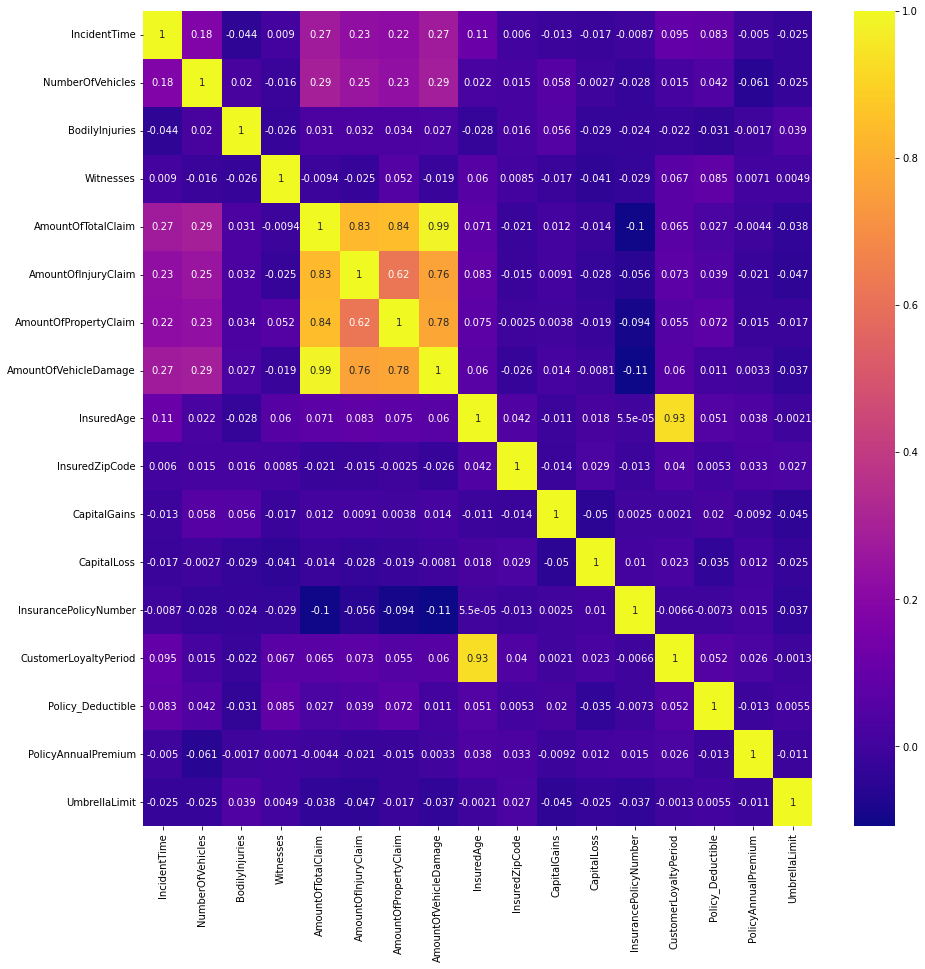

In [19]:
corrmat = Merge.corr()#correlartion
f, ax = plt.subplots(figsize =(15,15))
sns.heatmap(corrmat, ax = ax, annot=True,cmap ="plasma")# corelation heatmap

<AxesSubplot:xlabel='InsuredHobbies', ylabel='count'>

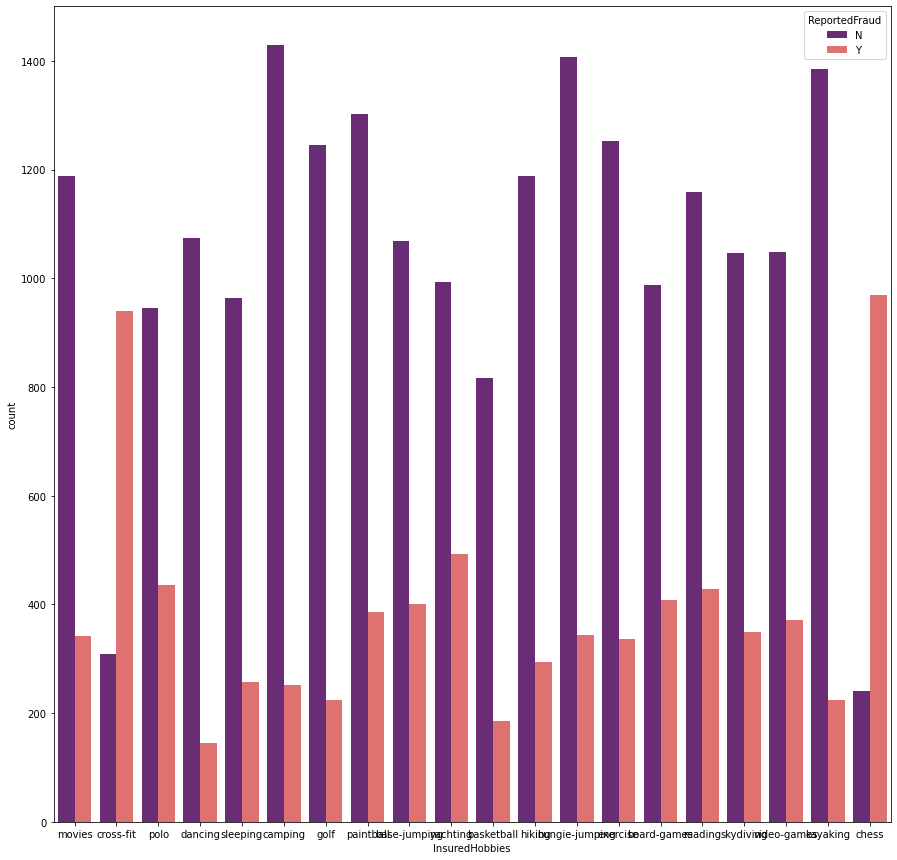

In [20]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(x='InsuredHobbies', hue='ReportedFraud', data=Merge, palette='magma')

<AxesSubplot:xlabel='VehicleMake', ylabel='count'>

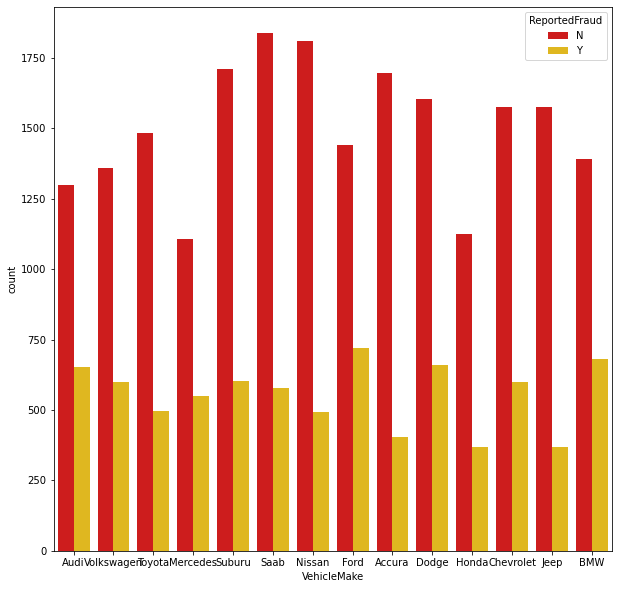

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='VehicleMake',hue='ReportedFraud',data=Merge,palette='hot')

<AxesSubplot:xlabel='ReportedFraud', ylabel='count'>

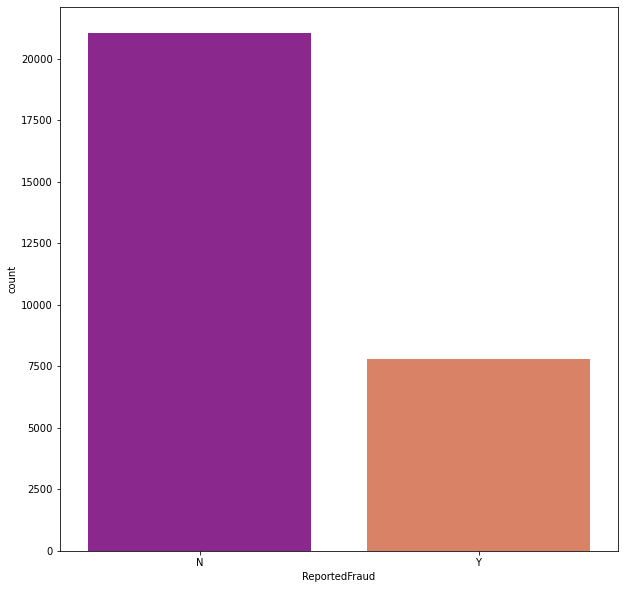

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='ReportedFraud',data=Merge,palette='plasma')

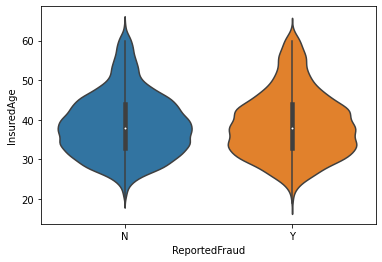

In [23]:
ax = sns.violinplot(x=Merge['ReportedFraud'], y=Merge['InsuredAge'])

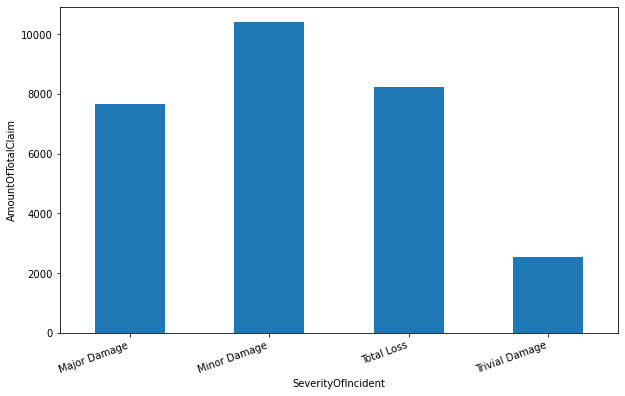

In [24]:
fig = plt.figure(figsize=(10,6))
ax = Merge.groupby('SeverityOfIncident').ReportedFraud.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('AmountOfTotalClaim')
plt.show()

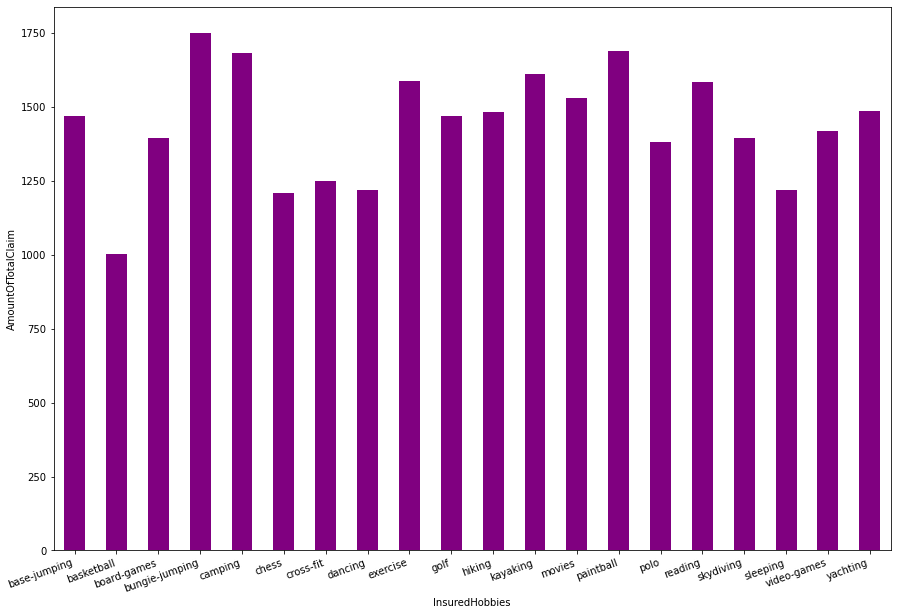

In [25]:
fig = plt.figure(figsize=(15,10))
ax=Merge.groupby(['InsuredHobbies']).AmountOfPropertyClaim.count().plot.bar(ylim=0,color='purple')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('AmountOfTotalClaim')
plt.show()

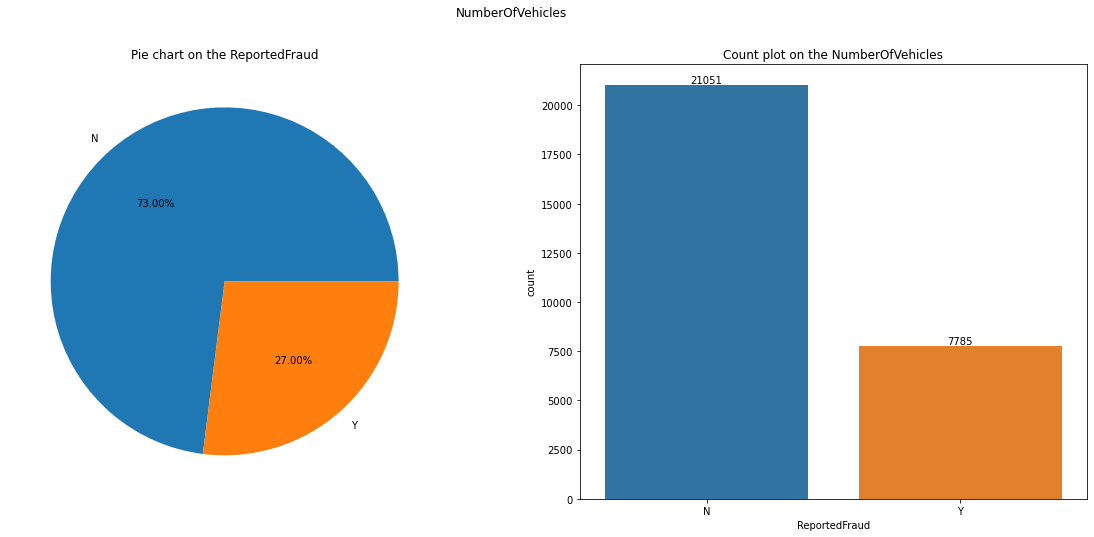

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(Merge['ReportedFraud'].value_counts(), labels=Merge['ReportedFraud'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the ReportedFraud')
plt.subplot(122)
ax = sns.countplot(data=Merge, x = 'ReportedFraud')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count plot on the NumberOfVehicles')
plt.suptitle('NumberOfVehicles')
plt.show()

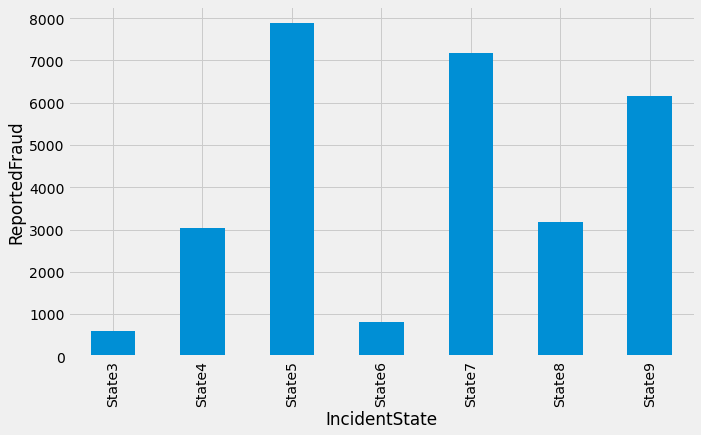

In [27]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Merge.groupby('IncidentState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('ReportedFraud')
plt.show()

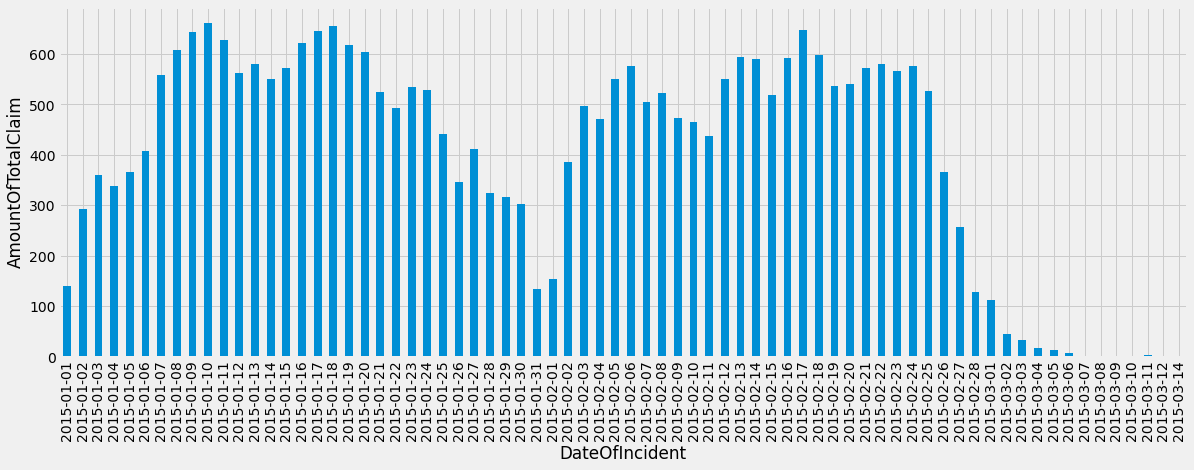

In [28]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = Merge.groupby('DateOfIncident').AmountOfTotalClaim.count().plot.bar(ylim=0)
ax.set_ylabel('AmountOfTotalClaim')
plt.show()

We see that, all the cases in above plot are for the months of January and February 2015

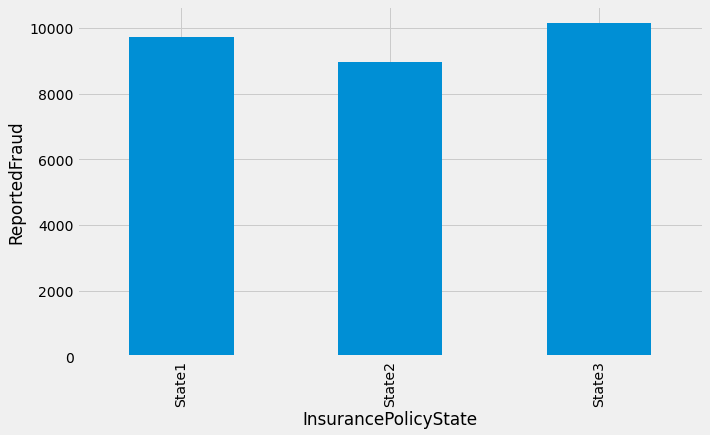

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Merge.groupby('InsurancePolicyState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('ReportedFraud')
plt.show()

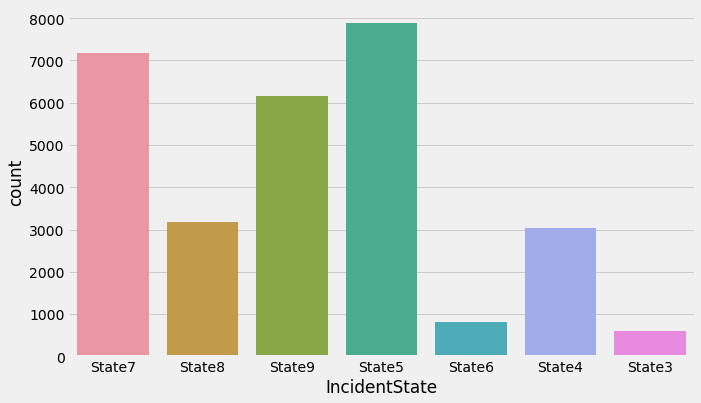

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='IncidentState', data=Merge)

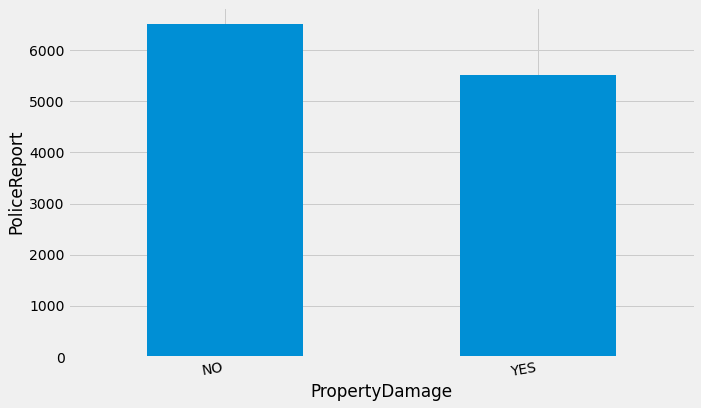

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= Merge.groupby('PropertyDamage').PoliceReport.count().plot.bar(ylim=0)
ax.set_ylabel('PoliceReport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [32]:
Merge.PoliceReport.value_counts()

NO     9898
YES    9133
Name: PoliceReport, dtype: int64

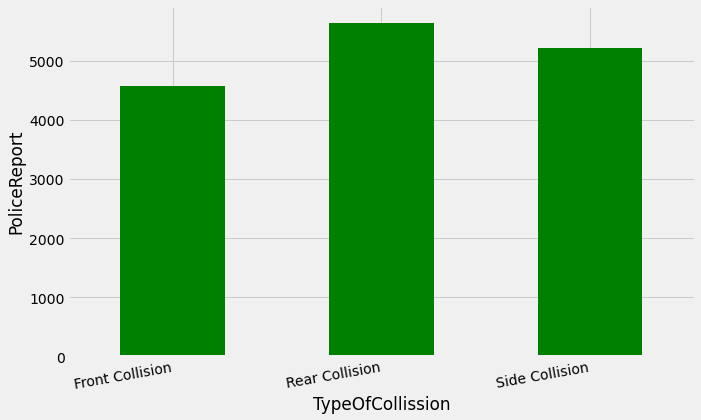

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= Merge.groupby('TypeOfCollission').PoliceReport.count().plot.bar(ylim=0,color='green')
ax.set_ylabel('PoliceReport')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

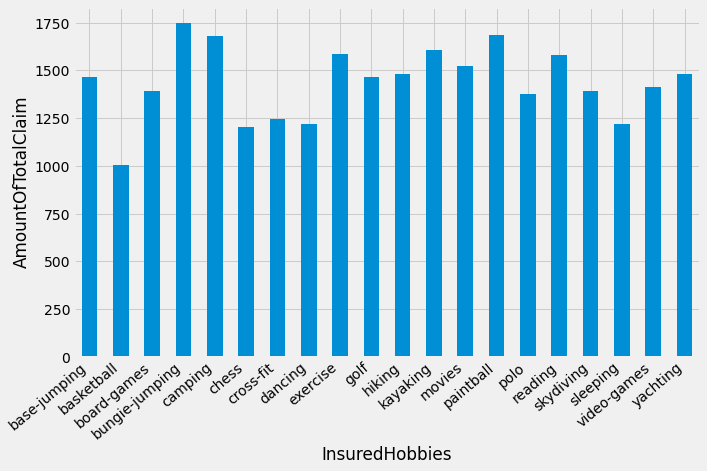

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= Merge.groupby('InsuredHobbies').AmountOfTotalClaim.count().plot.bar(ylim=0)
ax.set_ylabel('AmountOfTotalClaim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

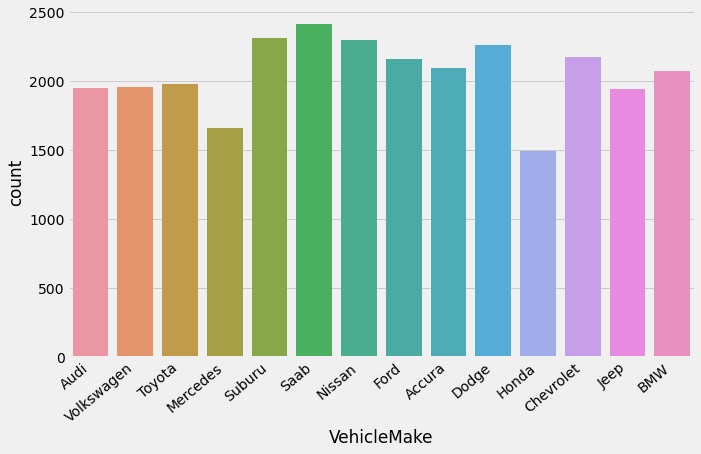

In [35]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='VehicleMake', data=Merge)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

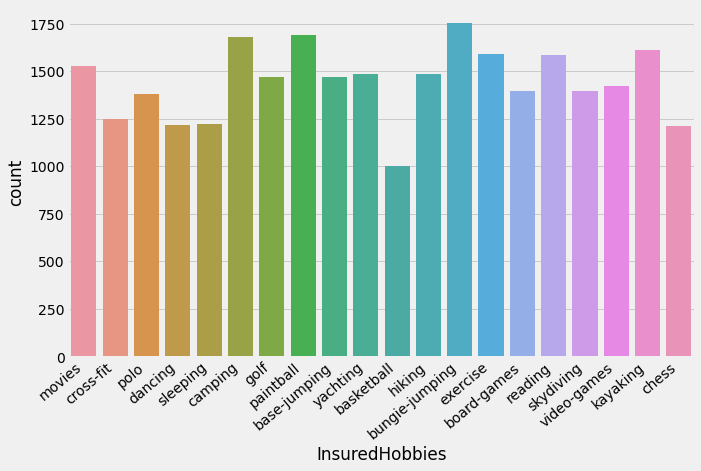

In [36]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='InsuredHobbies', data=Merge)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

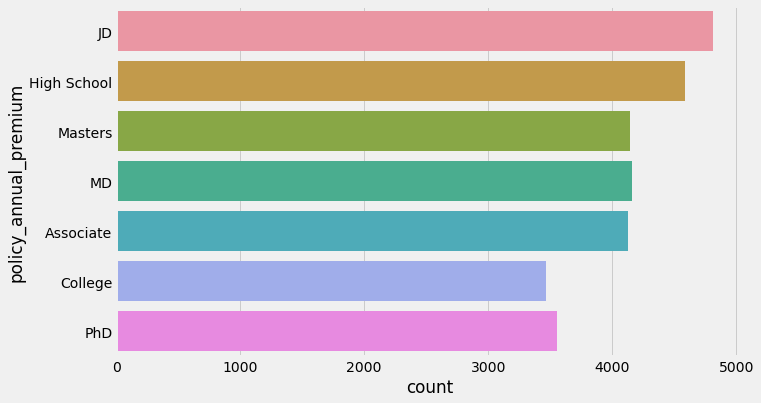

In [37]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'InsuredEducationLevel', data=Merge) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

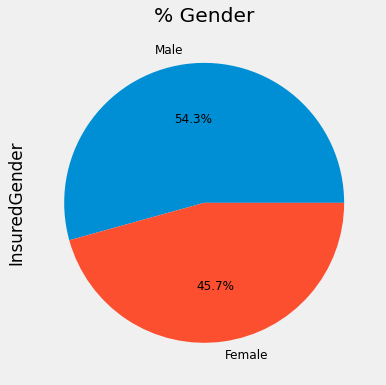

In [38]:
fig = plt.figure(figsize=(10,6))
ax = (Merge['InsuredGender'].value_counts()*100.0 /len(Merge))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

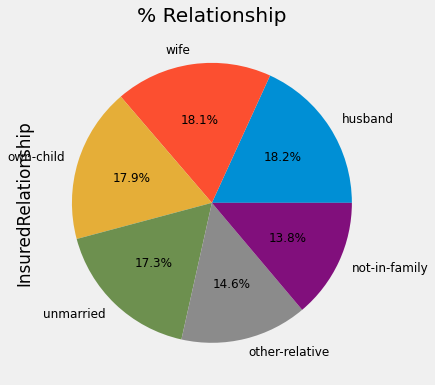

In [39]:
fig = plt.figure(figsize=(10,6))
ax = (Merge['InsuredRelationship'].value_counts()*100.0 /len(Merge))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

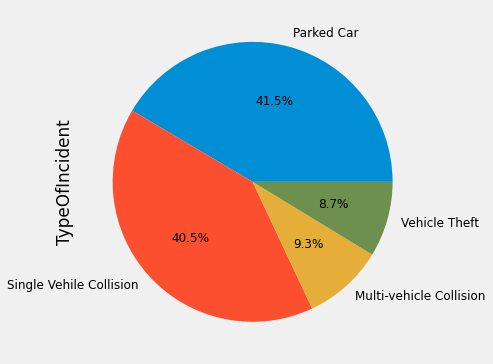

In [40]:
fig = plt.figure(figsize=(10,6))
ax = (Merge['TypeOfIncident'].value_counts()*100.0 /len(Merge))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

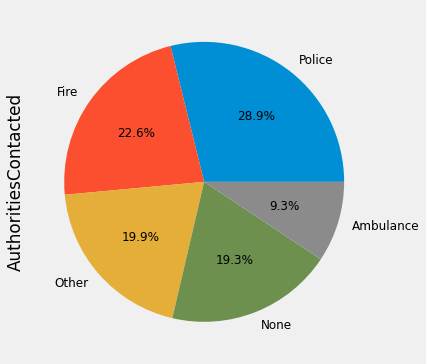

In [41]:
fig = plt.figure(figsize=(10,6))
ax = (Merge['AuthoritiesContacted'].value_counts()*100.0 /len(Merge))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

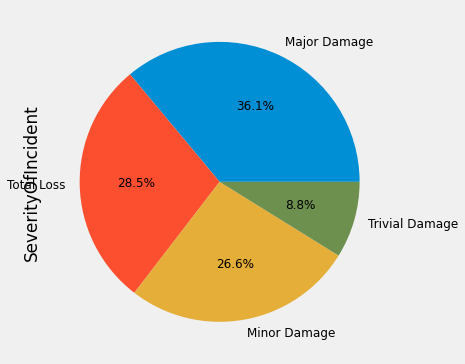

In [42]:
fig = plt.figure(figsize=(10,6))
ax = (Merge['SeverityOfIncident'].value_counts()*100.0 /len(Merge))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

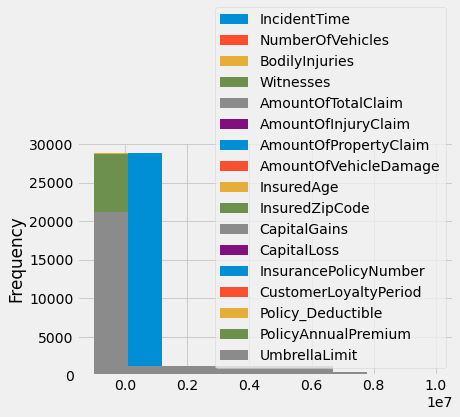

In [43]:
# Generate a Histogram plot for anomaly detection
Merge.plot(kind='hist')
plt.show()

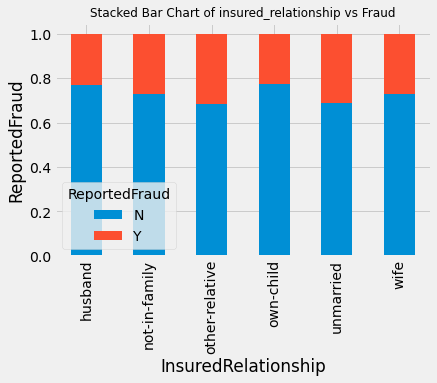

In [44]:
table=pd.crosstab(Merge.InsuredRelationship, Merge.ReportedFraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of insured_relationship vs Fraud', fontsize=12)
plt.xlabel('InsuredRelationship')
plt.ylabel('ReportedFraud')
plt.show()

In [45]:
data = pd.read_csv('Fraudlent_claims.csv')

<AxesSubplot:xlabel='count', ylabel='InsuredRelationship'>

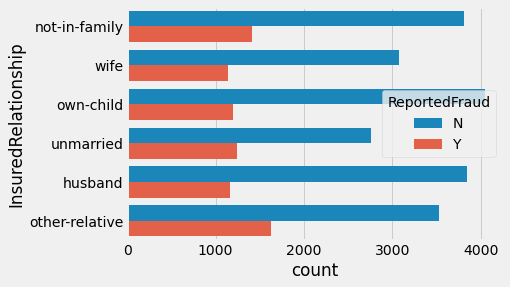

In [46]:
plt.style.use('fivethirtyeight')
sns.countplot(data = data , y = 'InsuredRelationship' , hue = 'ReportedFraud')

In [47]:
fraud = data['ReportedFraud'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

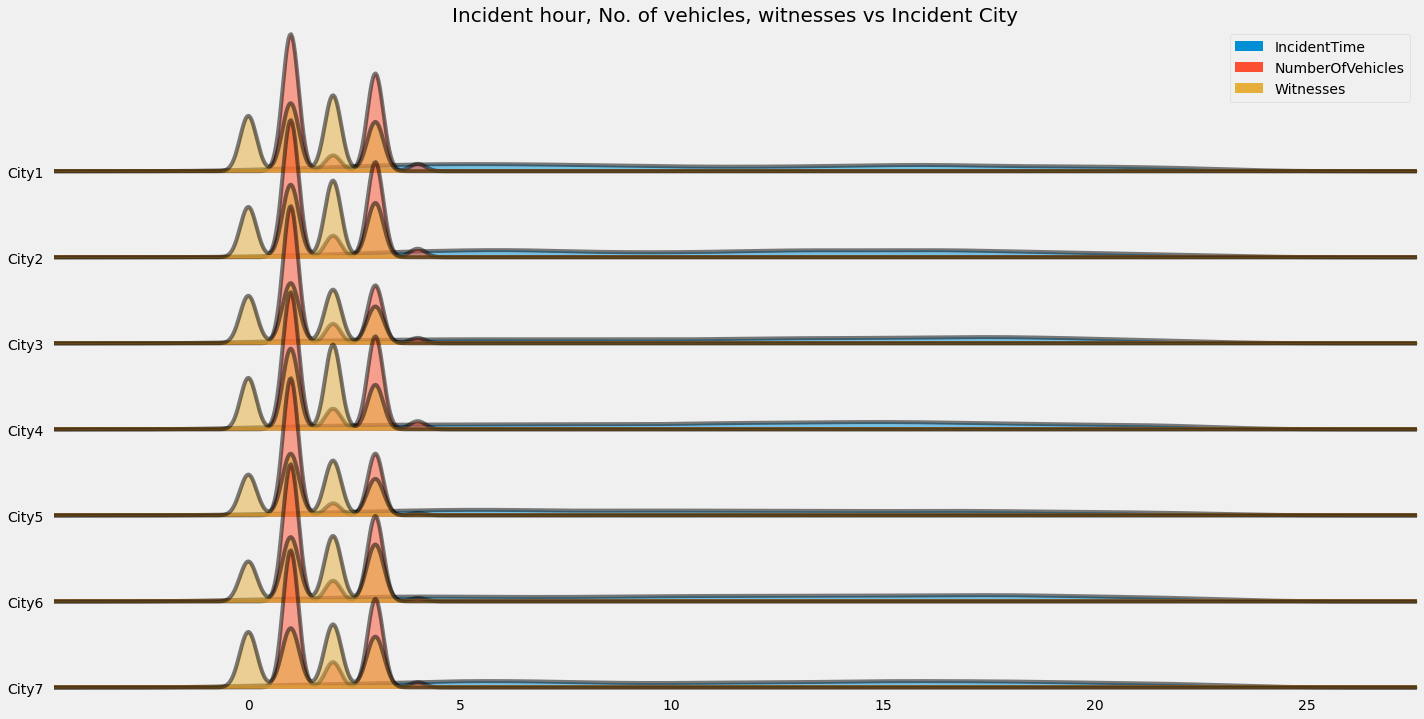

In [48]:
fig, axes = joypy.joyplot(data,
                         column = ['IncidentTime','NumberOfVehicles', 'Witnesses'],
                         by = 'IncidentCity',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.5, 
                         legend = True)

plt.title('Incident hour, No. of vehicles, witnesses vs Incident City', fontsize = 20)
plt.show()

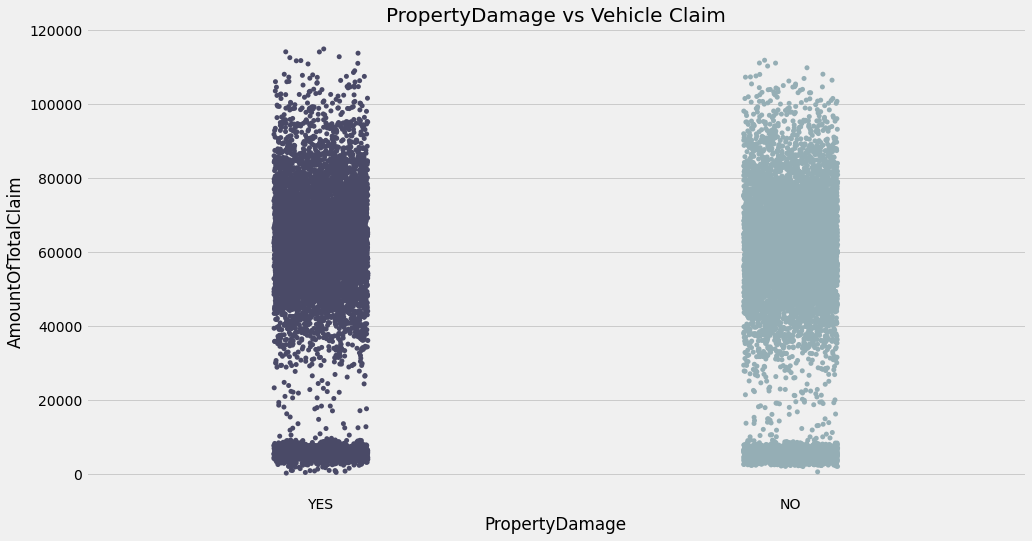

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(data['PropertyDamage'], data['AmountOfTotalClaim'], palette = 'bone')
plt.title('PropertyDamage vs Vehicle Claim', fontsize = 20)
plt.show()

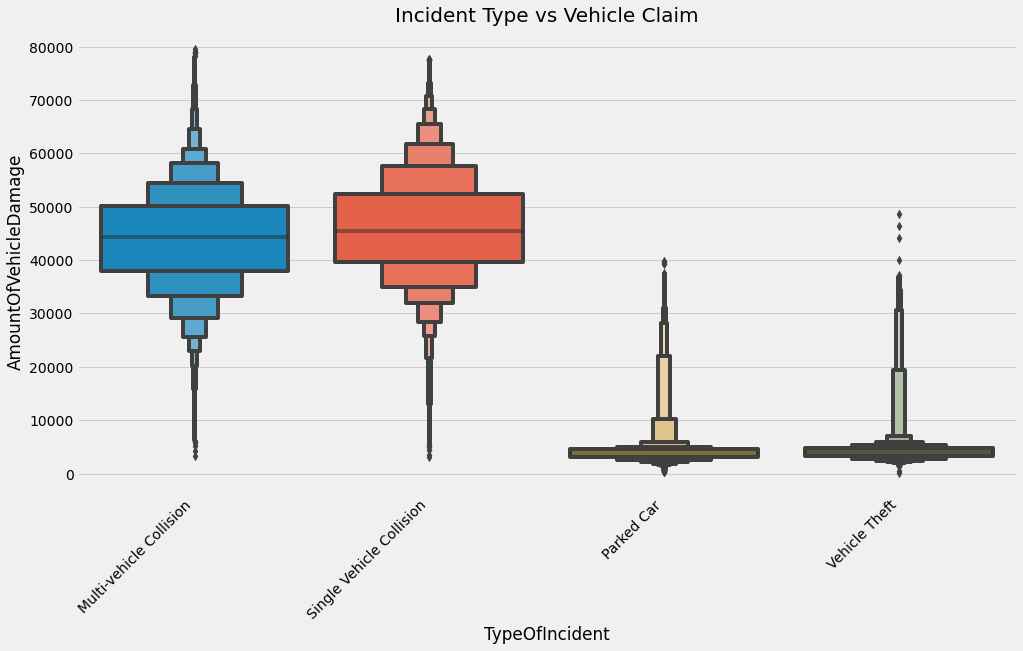

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=data, x='TypeOfIncident', y='AmountOfVehicleDamage')
plt.title('Incident Type vs Vehicle Claim', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

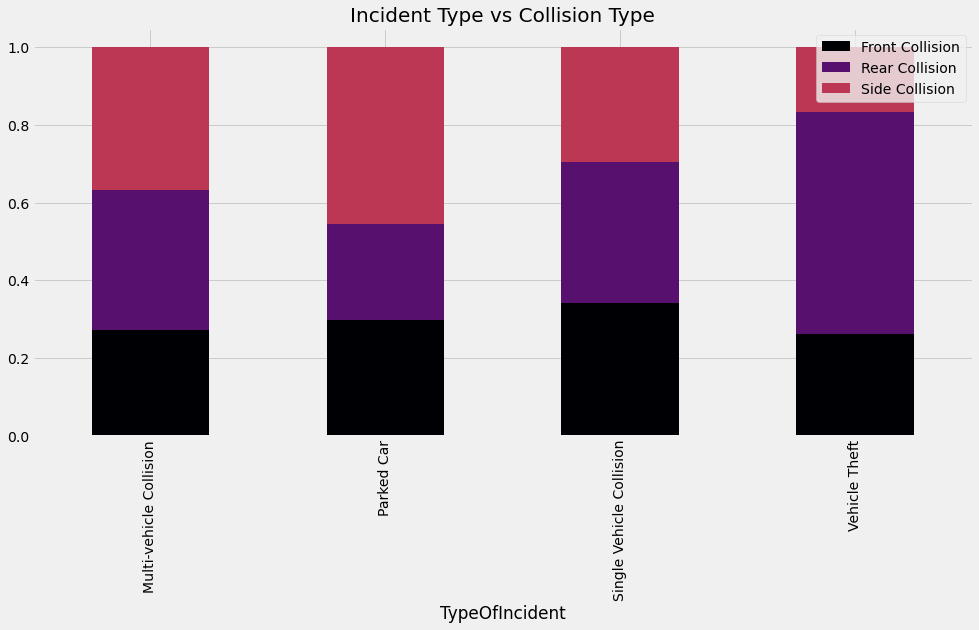

In [51]:
incident = pd.crosstab(data['TypeOfIncident'], data['TypeOfCollission'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

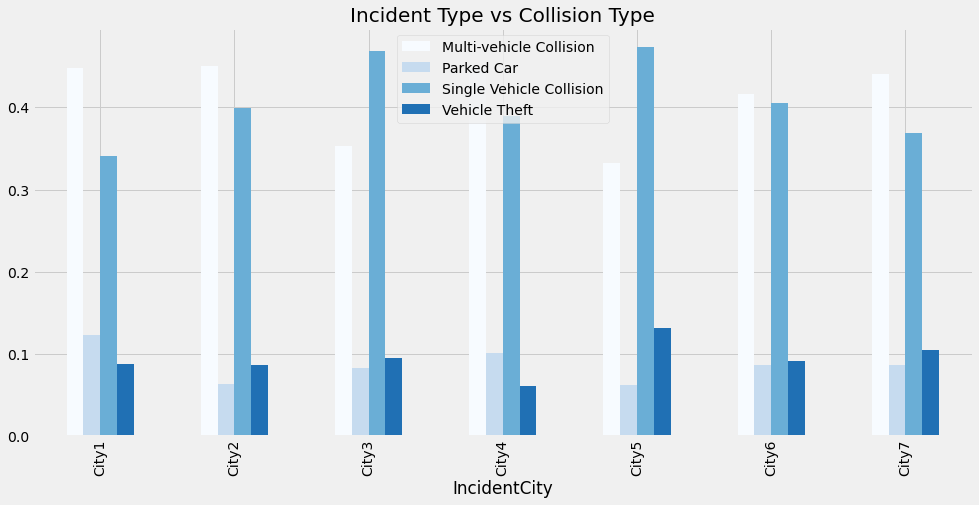

In [52]:
incident = pd.crosstab(data['IncidentCity'], data['TypeOfIncident'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

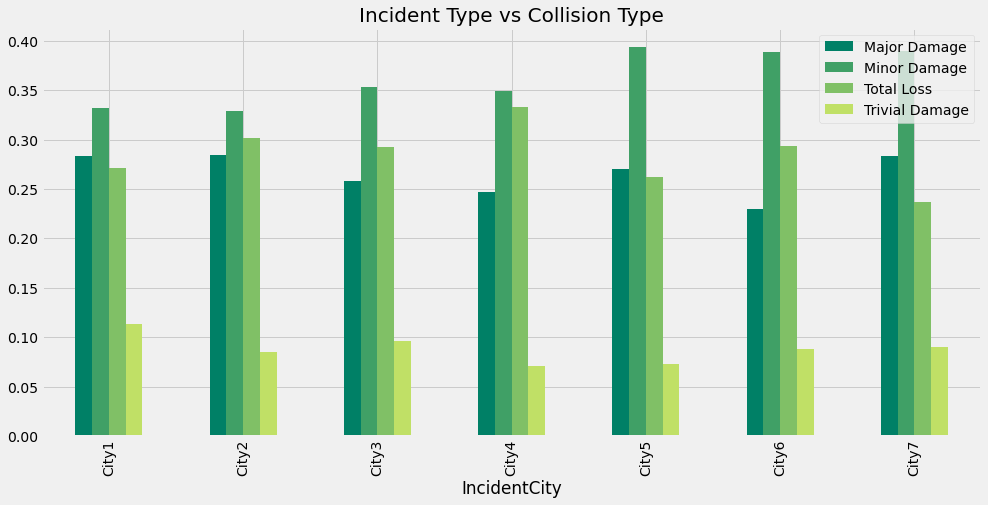

In [53]:
incident = pd.crosstab(data['IncidentCity'], data['SeverityOfIncident'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

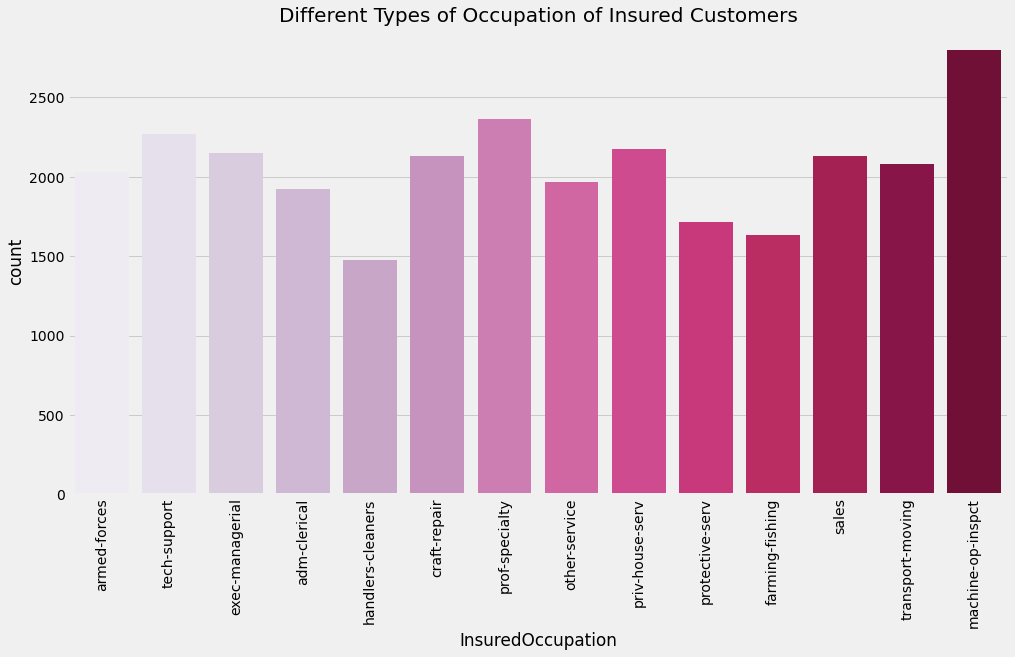

In [54]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['InsuredOccupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

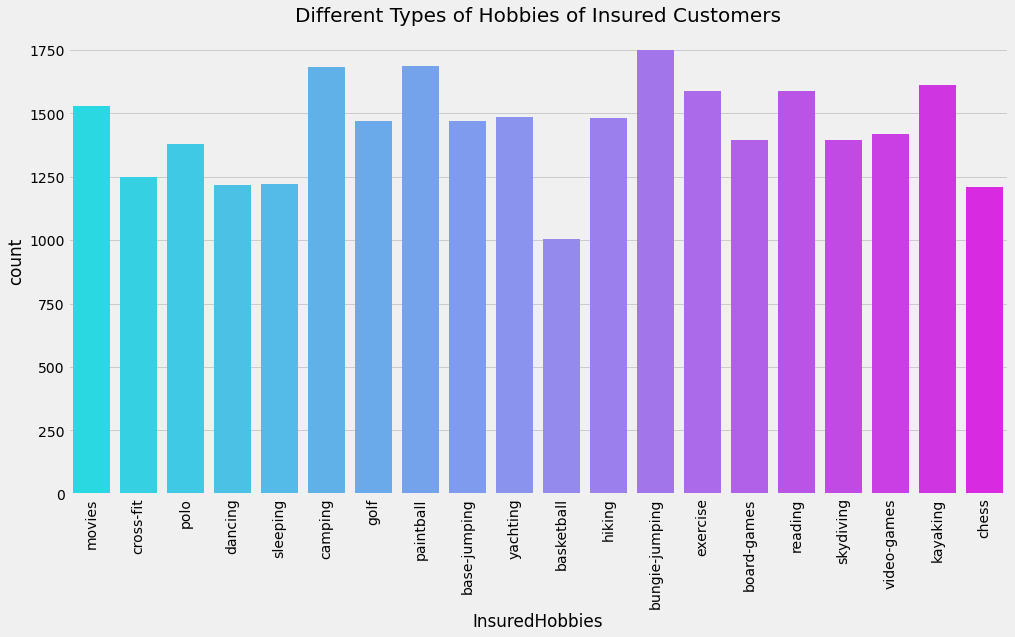

In [55]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['InsuredHobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

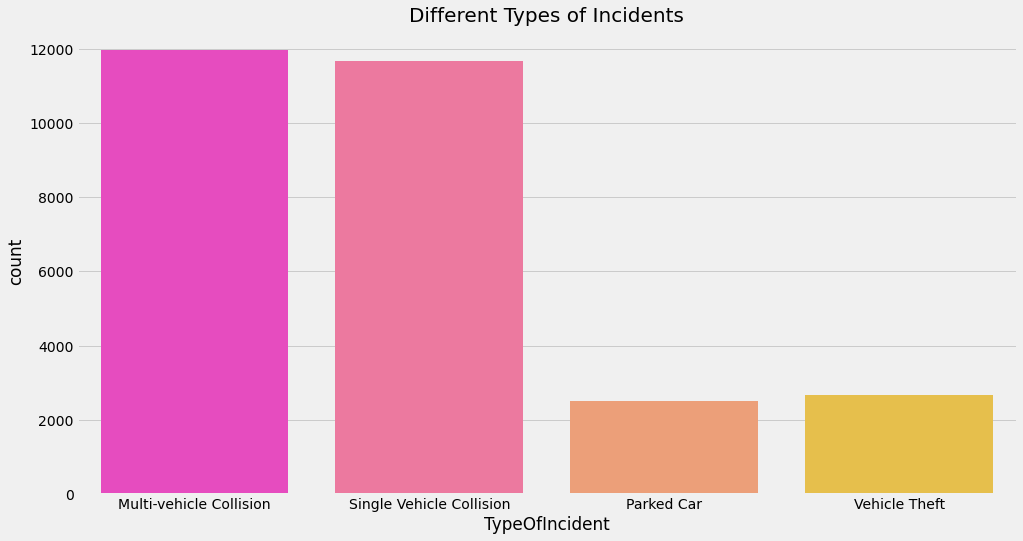

In [56]:
# let's check the incident types

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['TypeOfIncident'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

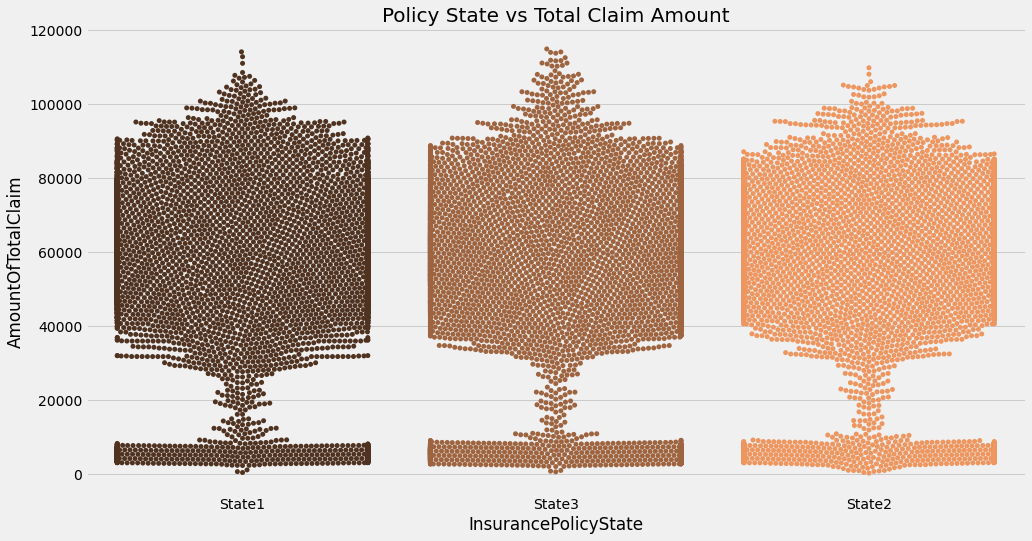

In [57]:
# swarm plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data['InsurancePolicyState'], data['AmountOfTotalClaim'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

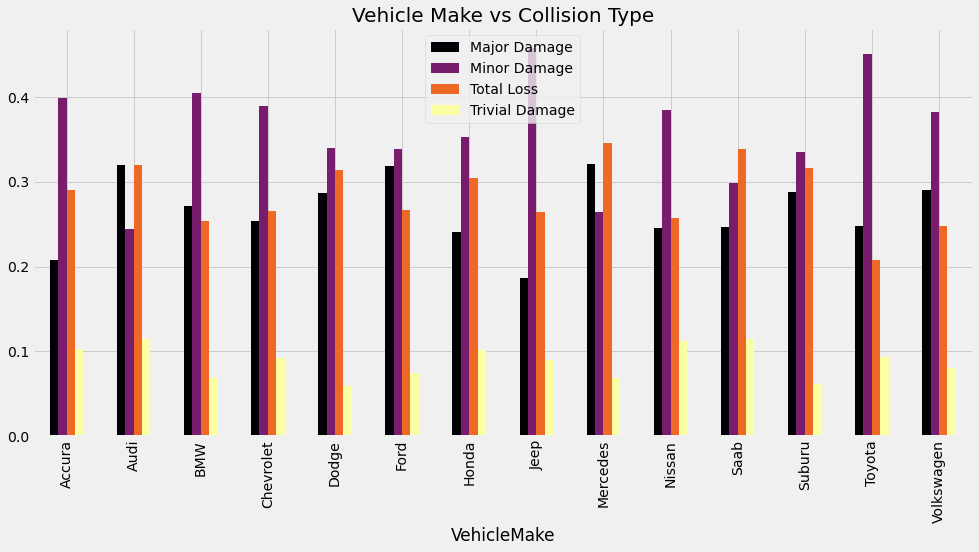

In [58]:
incident = pd.crosstab(data['VehicleMake'], data['SeverityOfIncident'])
colors = plt.cm.inferno(np.linspace(0, 1, 4))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Vehicle Make vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

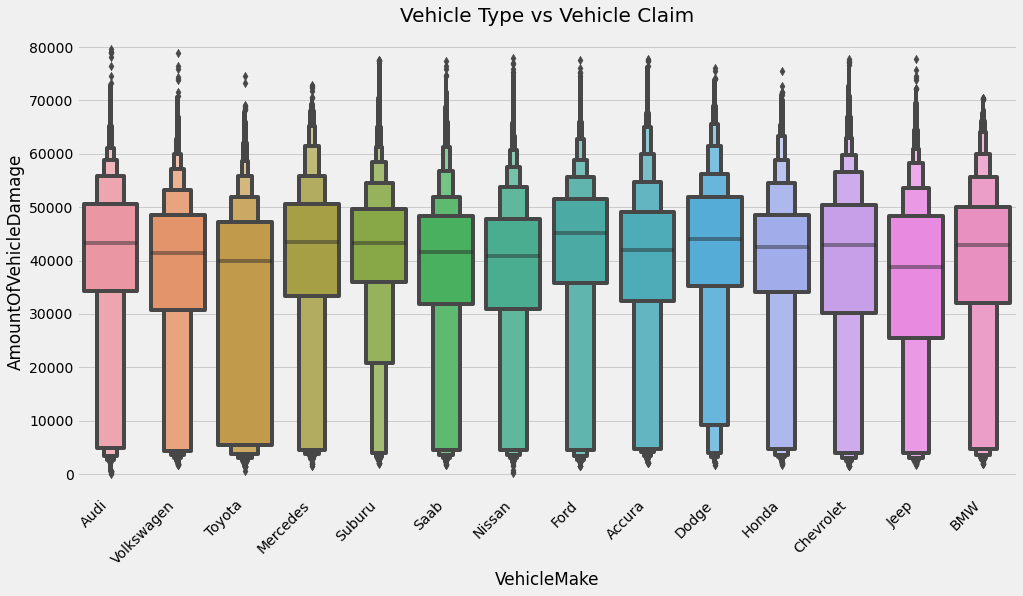

In [59]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=data, x='VehicleMake', y='AmountOfVehicleDamage')
plt.title('Vehicle Type vs Vehicle Claim', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

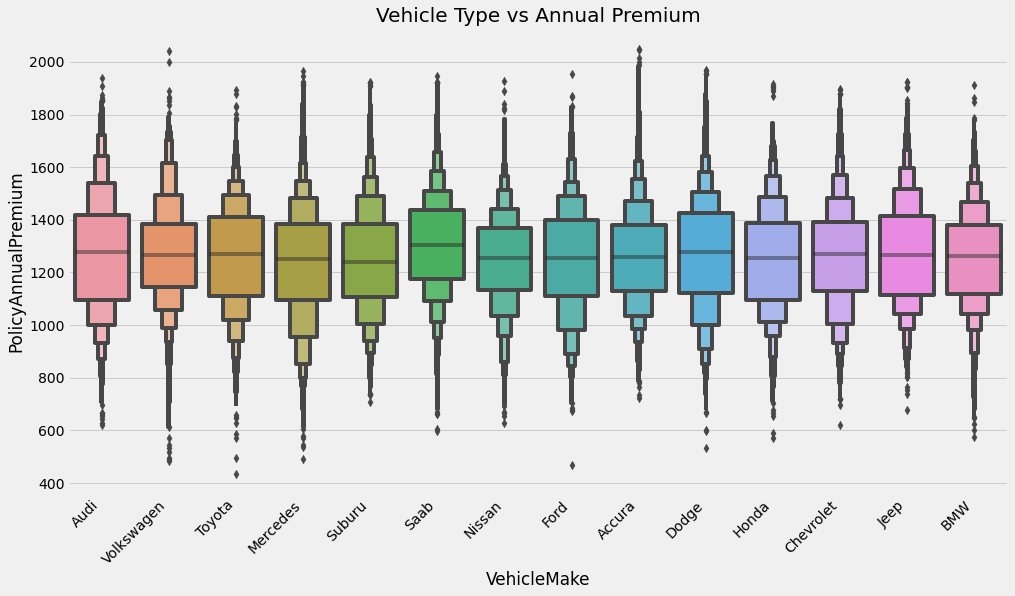

In [60]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.boxenplot(data=data, x='VehicleMake', y='PolicyAnnualPremium',)
plt.title('Vehicle Type vs Annual Premium', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

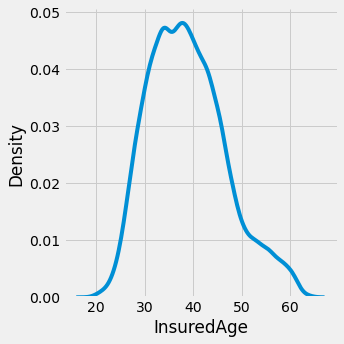

In [61]:
plt.style.use('fivethirtyeight')
sns.displot(data = data , x = 'InsuredAge' , kind = 'kde', palette = 'PuRd')

Text(0.5, 1.0, 'Distribution of Age')

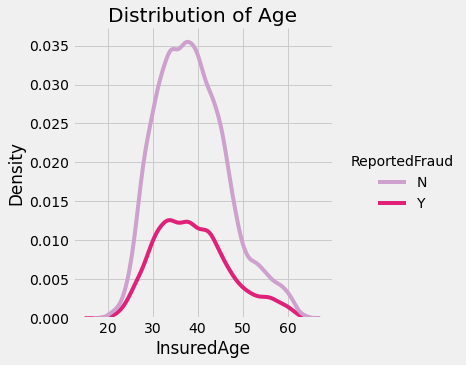

In [62]:
plt.style.use('fivethirtyeight')
sns.displot(data = data , x = 'InsuredAge' , kind = 'kde' , hue = 'ReportedFraud' ,palette = 'PuRd')
plt.title('Distribution of Age')

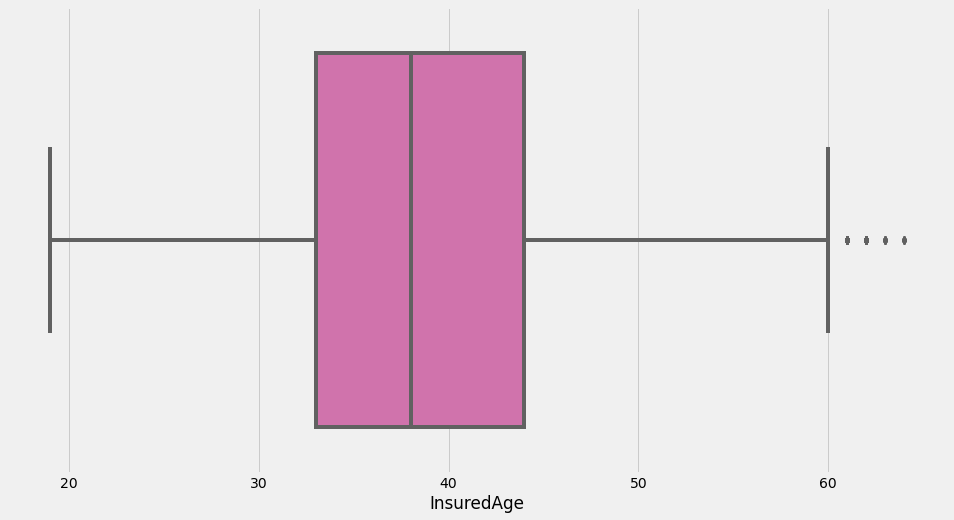

In [63]:
sns.boxplot(data = data , x = 'InsuredAge' , palette = 'PuRd')
plt.style.use('fivethirtyeight')

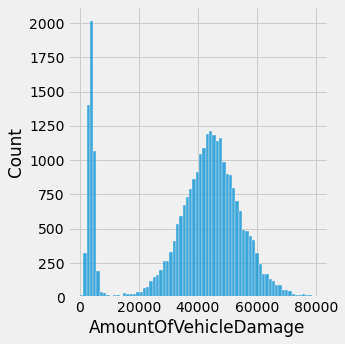

In [64]:
sns.displot(data = data , x = 'AmountOfVehicleDamage' , palette = 'spring')

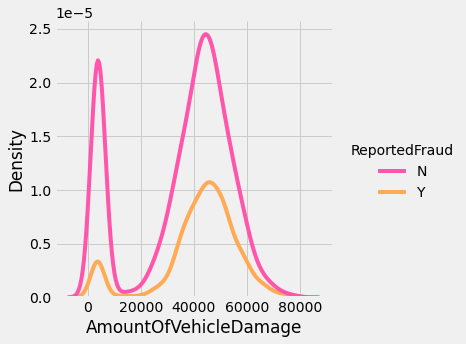

In [65]:
sns.displot(data = data , x = 'AmountOfVehicleDamage' ,kind = 'kde' , palette = 'spring' , hue = 'ReportedFraud')

<AxesSubplot:xlabel='InsuredAge', ylabel='ReportedFraud'>

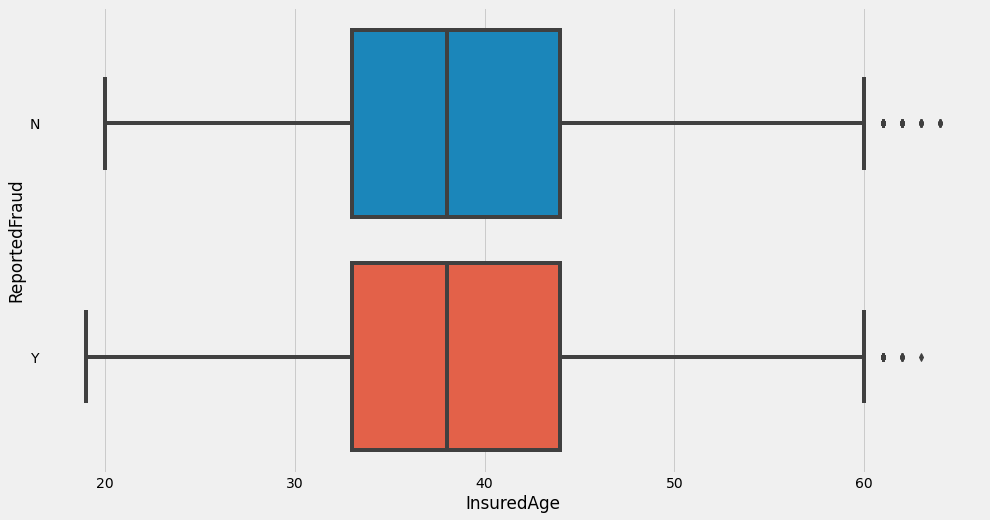

In [66]:
sns.boxplot(data = data , x = 'InsuredAge' , y = 'ReportedFraud')

In [67]:
data['TotalGains'] = data.apply(lambda x : x['CapitalGains'] + x['CapitalLoss'], axis =1)

In [68]:
data.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  ...  Policy_Deductible PolicyAnnualPremium  \
0   Location 1311          17.0  ...               1000             1632.73   
1   Location 1311          10.0  ...               1000             1255.19   
2   Location 2081          22.0  ...                617             1373.38   
3   Location 2081          22.0  ...                722             1337.60   
4   Location 1695          10.0  ...                500             1353.73   

   UmbrellaLimit  InsuredRelationship     VehicleID  VehicleModel  \
0              0        not-in-family  Vehicle26917            A5   
1              0        not-in-family  Vehicle15893            A5   
2              0                 wife   Vehicle5152         Jetta   
3              0            own-child  Vehicle37363         Jetta   
4        4279863            unmarried  Vehicle28633           CRV   

   VehicleMake  VehicleYOM  ReportedFraud  TotalGains  
0         Audi        2008              N        8200  
1         Audi        2006              N       22100  
2   Volkswagen        1999              N        2700  
3   Volkswagen        2003              N      -25500  
4       Toyota        2010              N      -41500  

[5 rows x 43 columns]

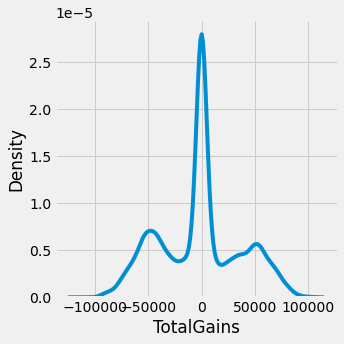

In [69]:
sns.displot(data = data , x = 'TotalGains' , kind = 'kde' )

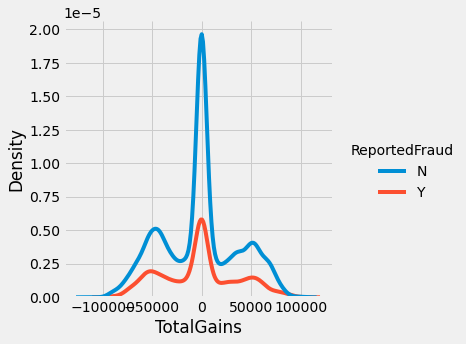

In [70]:
sns.displot(data = data , x ='TotalGains', hue = 'ReportedFraud' , kind = 'kde')

<AxesSubplot:xlabel='TotalGains', ylabel='ReportedFraud'>

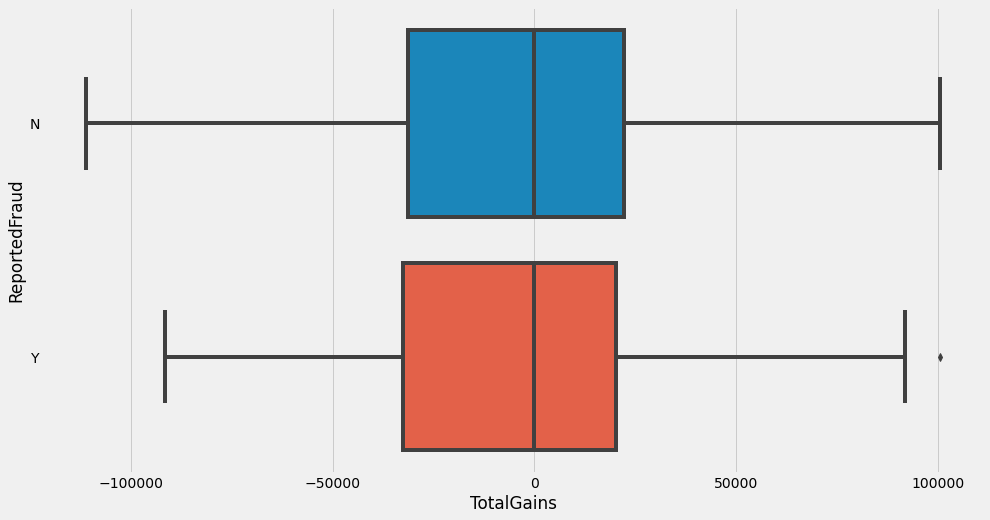

In [71]:
sns.boxplot(data = data , x ='TotalGains', y = 'ReportedFraud')

In [72]:
data['CustomerLoyaltyPeriod'] = data['CustomerLoyaltyPeriod'].astype(int)

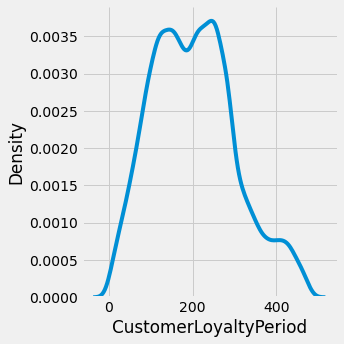

In [73]:
sns.displot(data = data , x = 'CustomerLoyaltyPeriod' , kind = 'kde')

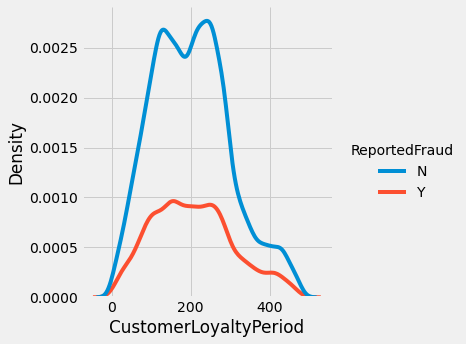

In [74]:
sns.displot(data = data , x = 'CustomerLoyaltyPeriod' , kind = 'kde' , hue = 'ReportedFraud')

In [75]:
data.groupby('InsuredHobbies')['ReportedFraud'].value_counts(normalize=True).mul(100)

InsuredHobbies  ReportedFraud
base-jumping    N                72.721088
                Y                27.278912
basketball      N                81.455633
                Y                18.544367
board-games     N                70.773639
                Y                29.226361
bungie-jumping  N                80.411194
                Y                19.588806
camping         N                85.008923
                Y                14.991077
chess           Y                80.165289
                N                19.834711
cross-fit       Y                75.260208
                N                24.739792
dancing         N                88.105004
                Y                11.894996
exercise        N                78.854626
                Y                21.145374
golf            N                84.693878
                Y                15.306122
hiking          N                80.175320
                Y                19.824680
kayaking        N       

<Figure size 1440x720 with 0 Axes>

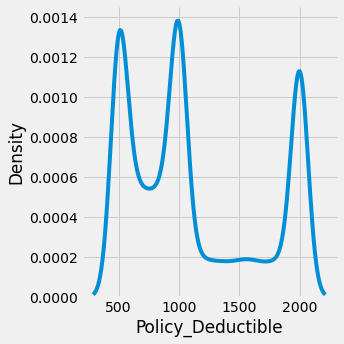

In [76]:
plt.figure(figsize=(20,10))
sns.displot(data=data,x='Policy_Deductible',kind='kde')

<Figure size 1440x720 with 0 Axes>

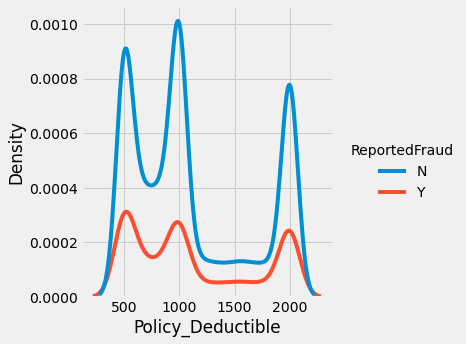

In [77]:
plt.figure(figsize=(20,10))
sns.displot(data=data,x='Policy_Deductible',kind='kde',hue='ReportedFraud')

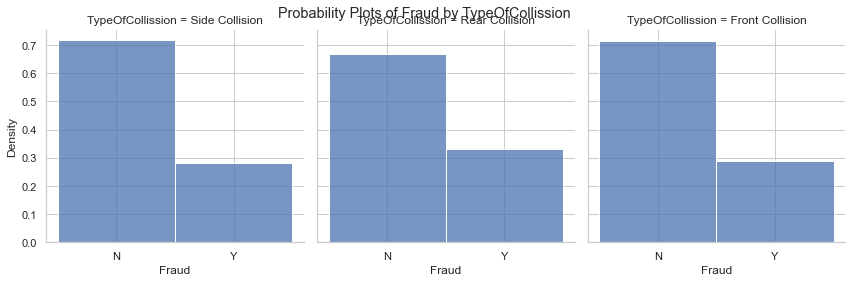

In [78]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='TypeOfCollission', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by TypeOfCollission ')

plt.show()

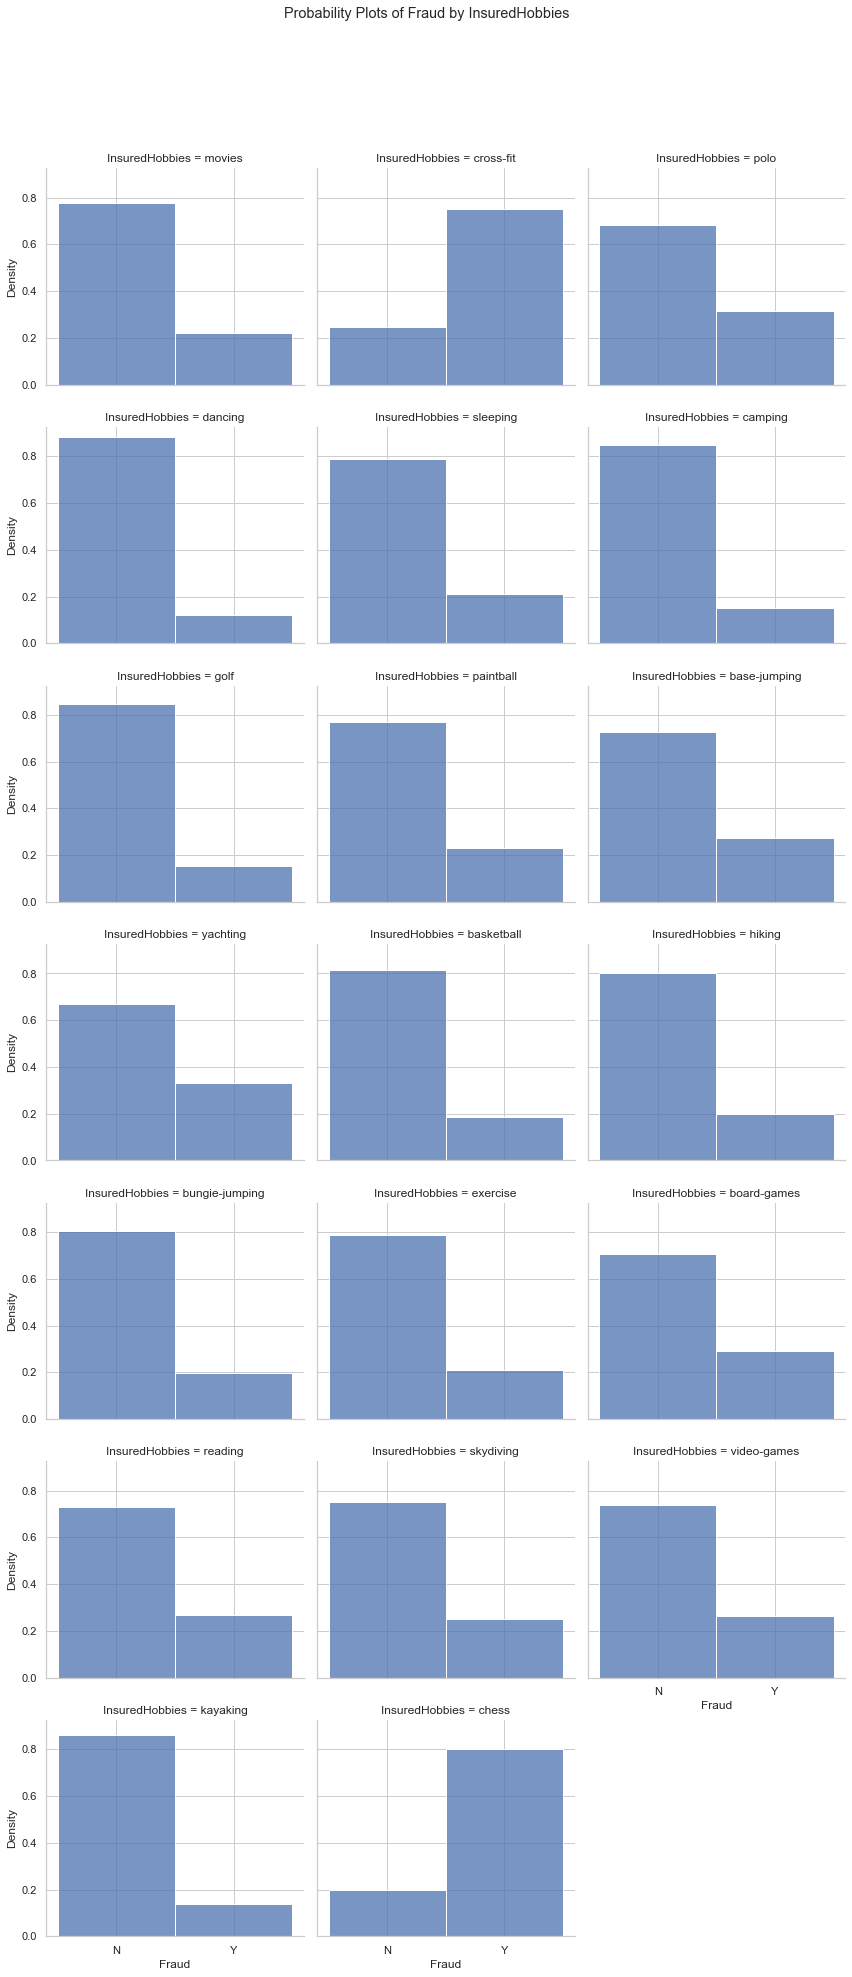

In [79]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='InsuredHobbies', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by InsuredHobbies')

plt.show()

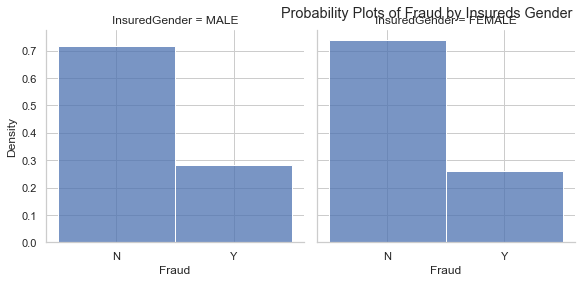

In [80]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='InsuredGender', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by Insureds Gender')

plt.show()

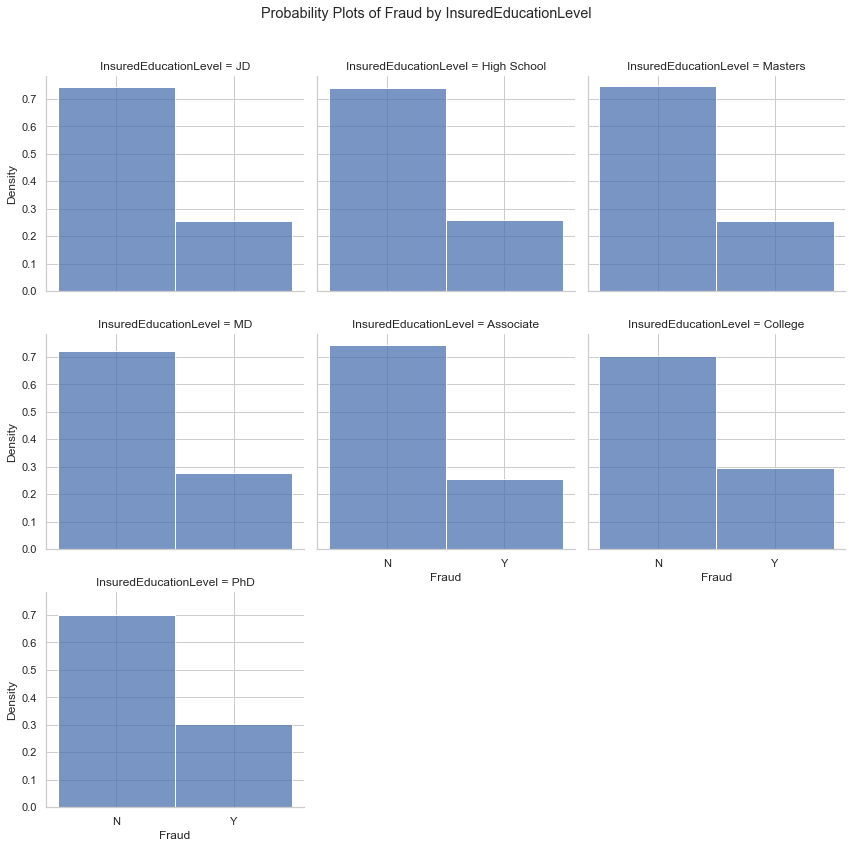

In [81]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='InsuredEducationLevel', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by InsuredEducationLevel')

plt.show()

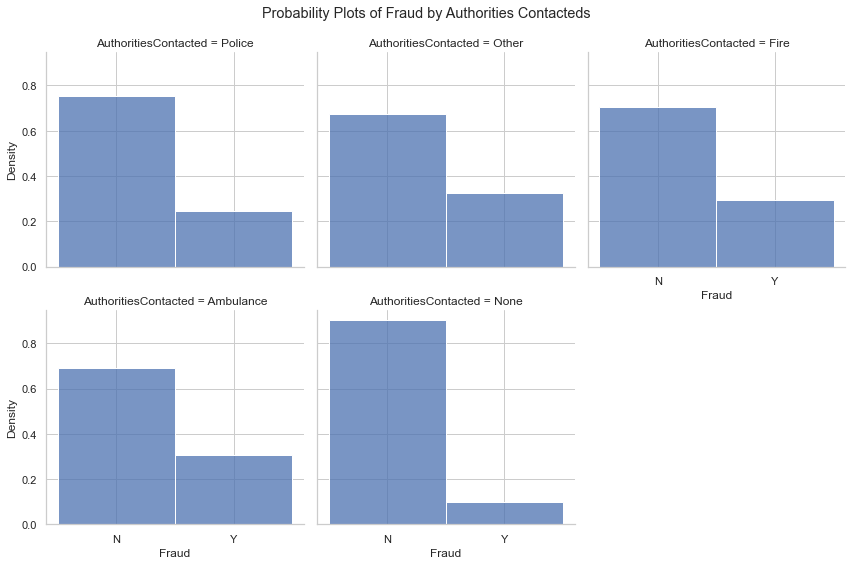

In [82]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='AuthoritiesContacted', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by Authorities Contacteds')

plt.show()

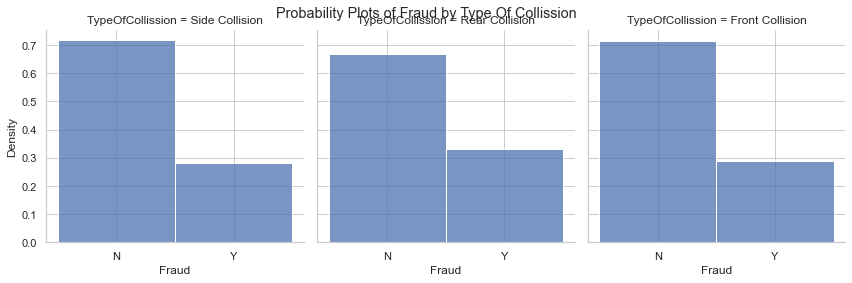

In [83]:
sns.set(style='whitegrid')

# Create separate probability plots for each category
g = sns.FacetGrid(data, col='TypeOfCollission', col_wrap=3, height=4)
g.map(sns.histplot, 'ReportedFraud', stat='density')

# Set common x and y axis labels
g.set_axis_labels('Fraud', 'Density')

# Set overall title for the figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probability Plots of Fraud by Type Of Collission')

plt.show()

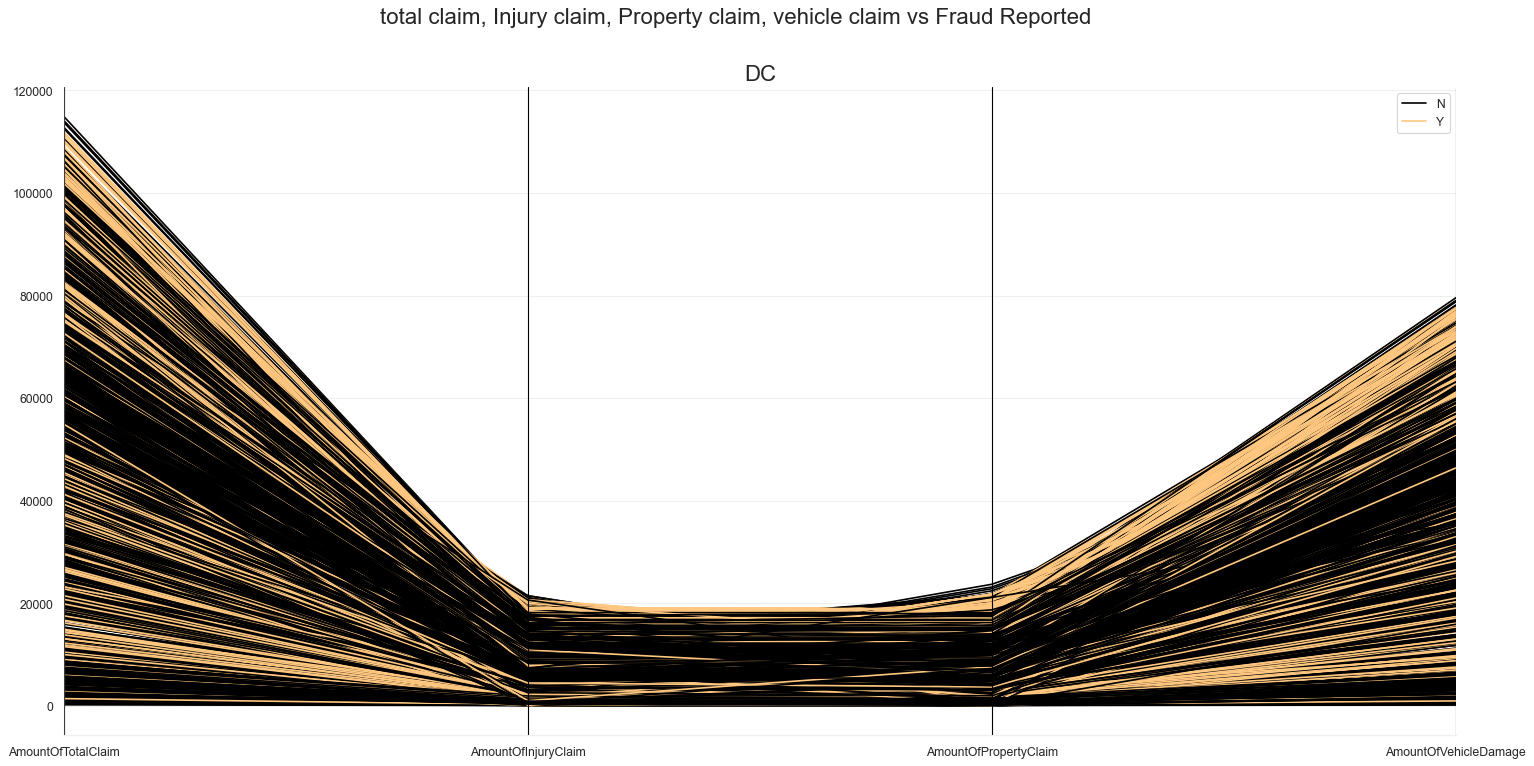

In [84]:
# Plot
plt.figure(figsize=(20, 10), dpi= 80)

parallel_coordinates(data[['AmountOfTotalClaim','AmountOfInjuryClaim', 'AmountOfPropertyClaim','AmountOfVehicleDamage','ReportedFraud']],
                     'ReportedFraud',  colormap = 'copper')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('DC', fontsize = 20)
plt.grid(alpha=0.3)


plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
plt.show()

### Univariate Analysis

<Figure size 4320x7200 with 0 Axes>

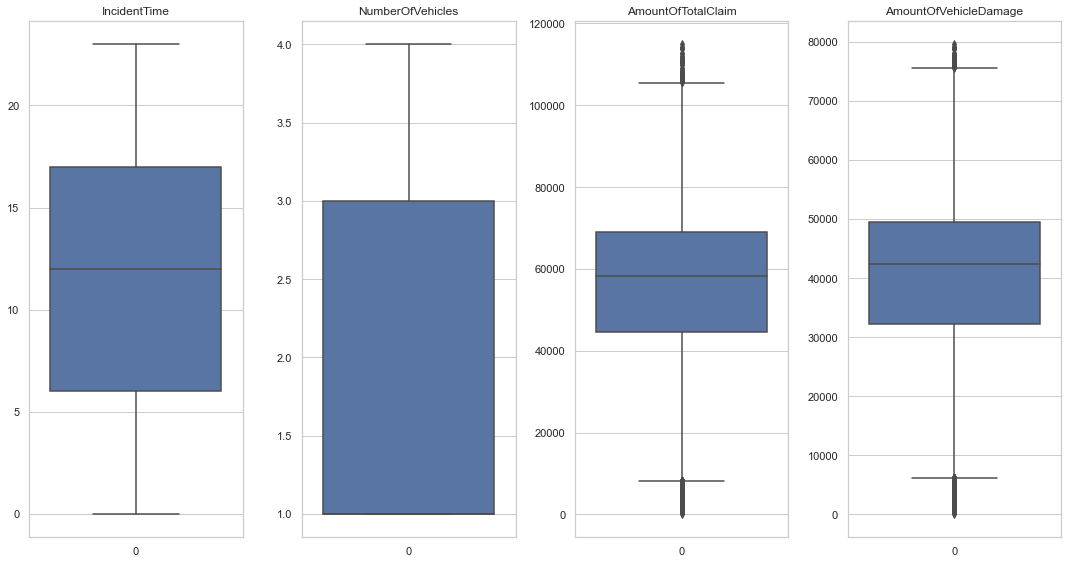

In [85]:
plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['IncidentTime', 'NumberOfVehicles', 'AmountOfTotalClaim', 'AmountOfVehicleDamage']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=Merge[column], ax=axis) 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()

#### Age column is skewed.

In [86]:
# Right skewed 
    
Merge['InsuredAge'].skew()  

0.5064125940712002

In [87]:
# Log transformation to handle right skewed data

Merge['InsuredAge1'] = np.log(Merge['InsuredAge']) 


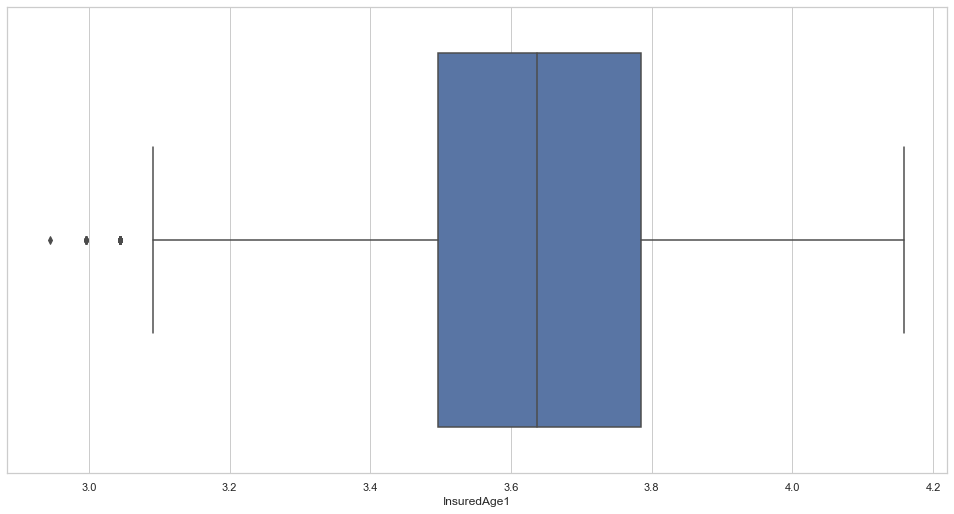

In [88]:
# After log transformation

sns.boxplot(x=Merge['InsuredAge1'])
plt.show()

<AxesSubplot:xlabel='Policy_CombinedSingleLimit', ylabel='count'>

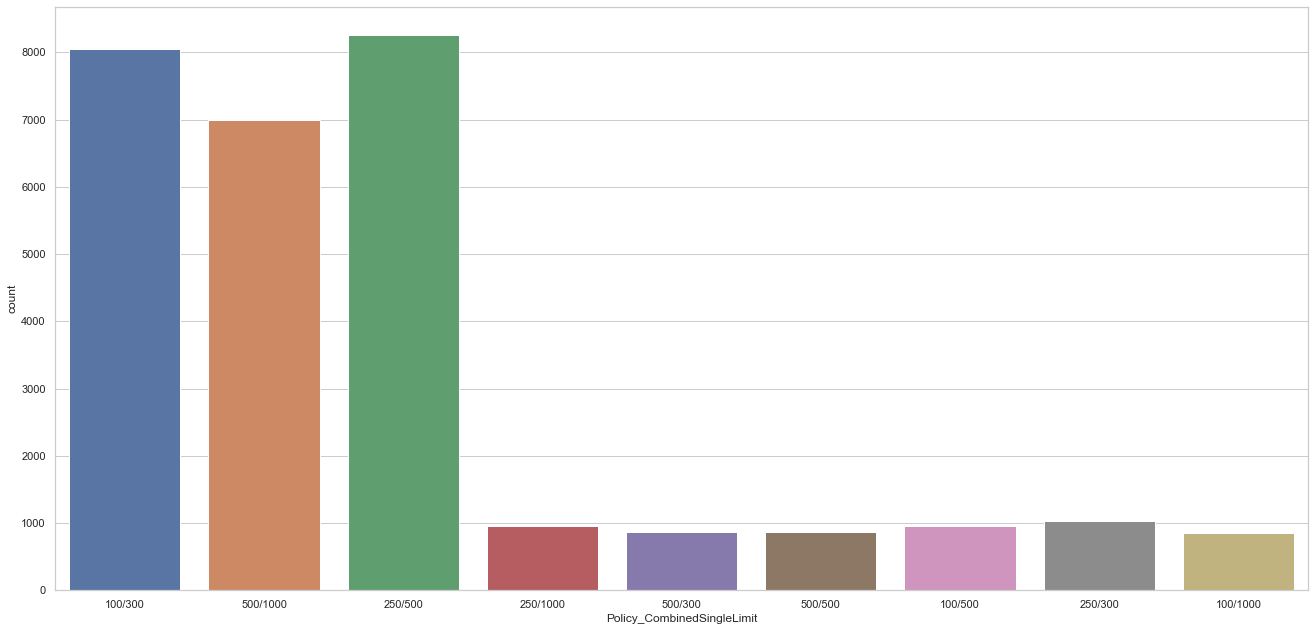

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Policy_CombinedSingleLimit')

# Data Preprocessing : -

### Unique Values

In [87]:
Merge=pd.read_csv("Fraudlent_claims.csv")

In [88]:
Merge

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0      Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1      Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2      Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3      Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4      Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   
...          ...            ...                       ...              ...   
28831   Cust9993     2015-01-24             Vehicle Theft              NaN   
28832   Cust9994     2015-02-09  Single Vehicle Collision  Front Collision   
28833   Cust9996     2015-01-28  Single Vehicle Collision   Rear Collision   
28834   Cust9997     2015-01-28  Single Vehicle Collision   Rear Collision   
28835   Cust9999     2015-01-13  Single Vehicle Collision  Front Collision   

      SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0             Total Loss               Police        State7        City1   
1             Total Loss               Police        State7        City5   
2           Minor Damage                Other        State8        City6   
3           Minor Damage                Other        State9        City6   
4           Minor Damage                 Fire        State8        City6   
...                  ...                  ...           ...          ...   
28831     Trivial Damage               Police        State9        City4   
28832       Minor Damage                 Fire        State8        City3   
28833       Minor Damage                 Fire        State9        City7   
28834       Minor Damage            Ambulance        State9        City3   
28835         Total Loss                Other        State8        City3   

      IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0       Location 1311          17.0  ...                     100/300   
1       Location 1311          10.0  ...                     100/300   
2       Location 2081          22.0  ...                    500/1000   
3       Location 2081          22.0  ...                    500/1000   
4       Location 1695          10.0  ...                     100/300   
...               ...           ...  ...                         ...   
28831   Location 1890           3.0  ...                    500/1000   
28832   Location 2097          17.0  ...                     100/300   
28833   Location 1452           1.0  ...                     250/500   
28834   Location 1876           1.0  ...                     250/500   
28835   Location 1874           9.0  ...                    500/1000   

      Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit  \
0                  1000              1632.73              0   
1                  1000              1255.19              0   
2                   617              1373.38              0   
3                   722              1337.60              0   
4                   500              1353.73        4279863   
...                 ...                  ...            ...   
28831               655              1276.01              0   
28832              1089              1273.38              0   
28833               787              1380.92        3448735   
28834               780              1389.29        3364301   
28835              2000               928.43        2909175   

      InsuredRelationship     VehicleID  VehicleModel  VehicleMake  \
0           not-in-family  Vehicle26917            A5         Audi   
1           not-in-family  Vehicle15893            A5         Audi   
2                    wife   Vehicle5152         Jetta   Volkswagen   
3               own-child  Vehicle37363         Jetta   Volkswagen   
4               unmarried  Vehicle28633           CRV       Toyota   
...                   ...           ...           ...          ...   
28831           unmarried  Vehicle13568     

In [89]:
Merge.nunique()

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     24
NumberOfVehicles                  4
PropertyDamage                    2
BodilyInjuries                    3
Witnesses                         4
PoliceReport                      2
AmountOfTotalClaim            21975
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
AmountOfVehicleDamage         20041
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

In [90]:
Merge.info()#To get dtypes and not nulls and shapes of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   287

### Handling Missing Values:

In [91]:
Merge.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [92]:
# Mode imputation for categorical column

In [93]:
imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(Merge[['TypeOfCollission','PropertyDamage','PoliceReport','InsuredGender','VehicleMake','Country']])
Merge[['TypeOfCollission','PropertyDamage','PoliceReport','InsuredGender','VehicleMake','Country']] = imputer.transform(Merge[['TypeOfCollission','PropertyDamage','PoliceReport','InsuredGender','VehicleMake','Country']])

In [94]:
Merge.isnull().sum()

CustomerID                      0
DateOfIncident                  0
TypeOfIncident                  0
TypeOfCollission                0
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
IncidentTime                   31
NumberOfVehicles                0
PropertyDamage                  0
BodilyInjuries                  0
Witnesses                      46
PoliceReport                    0
AmountOfTotalClaim             50
AmountOfInjuryClaim             0
AmountOfPropertyClaim           0
AmountOfVehicleDamage           0
InsuredAge                      0
InsuredZipCode                  0
InsuredGender                   0
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
CapitalGains                    0
CapitalLoss                     0
Country                         0
InsurancePolicyNumber           0
CustomerLoyalt

In [95]:
# Data is normally distributed or not

In [96]:
from scipy.stats import shapiro
# Define the columns of interest
cols = ['IncidentTime', 'Witnesses', 'AmountOfTotalClaim', 'PolicyAnnualPremium']

# Test for normality using the Shapiro-Wilk test for each column
for col in cols:
    stat, p = shapiro(Merge[col])
    print(f'Shapiro-Wilk test for normality on {col}')
    print(f'Statistics: {stat:.4f}, p-value: {p:.4f}')
    if p > 0.05:
        print(f'The data in {col} is likely normally distributed (p > 0.05)')
    else:
        print(f'The data in {col} is likely not normally distributed (p <= 0.05)')


Shapiro-Wilk test for normality on IncidentTime
Statistics: nan, p-value: 1.0000
The data in IncidentTime is likely normally distributed (p > 0.05)
Shapiro-Wilk test for normality on Witnesses
Statistics: nan, p-value: 1.0000
The data in Witnesses is likely normally distributed (p > 0.05)
Shapiro-Wilk test for normality on AmountOfTotalClaim
Statistics: nan, p-value: 1.0000
The data in AmountOfTotalClaim is likely normally distributed (p > 0.05)
Shapiro-Wilk test for normality on PolicyAnnualPremium
Statistics: nan, p-value: 1.0000
The data in PolicyAnnualPremium is likely normally distributed (p > 0.05)


In [97]:
for col in cols:
    print(f"Missing values in {col}: {Merge[col].isnull().sum()}")


Missing values in IncidentTime: 31
Missing values in Witnesses: 46
Missing values in AmountOfTotalClaim: 50
Missing values in PolicyAnnualPremium: 141


In [98]:
# Define the columns of interest
columns = ['IncidentTime','Witnesses','AmountOfTotalClaim','PolicyAnnualPremium']

# Loop over the columns and count the number of outliers
outliers_counts = {}
for col in columns:
    outliers_counts[col] = Merge[Merge[col] > 69.6][col].count()

# Calculate the percentage of outliers for each column
total_rows = len(Merge)
outliers_percentages = {col: round(count*100/total_rows, 2) for col, count in outliers_counts.items()}

# Print the results
for col in columns:
    print(f'Number of outliers in {col}: {outliers_counts[col]}')
    print(f'Percentage of outliers in {col}: {outliers_percentages[col]}%\n')

Number of outliers in IncidentTime: 0
Percentage of outliers in IncidentTime: 0.0%

Number of outliers in Witnesses: 0
Percentage of outliers in Witnesses: 0.0%

Number of outliers in AmountOfTotalClaim: 28786
Percentage of outliers in AmountOfTotalClaim: 99.83%

Number of outliers in PolicyAnnualPremium: 28695
Percentage of outliers in PolicyAnnualPremium: 99.51%



In [99]:
# Mean imputation if the data is not normally distributed

In [100]:
imputer = SimpleImputer(strategy='mean', 
                        missing_values=np.nan)
imputer = imputer.fit(Merge[['IncidentTime','Witnesses']])
Merge[['IncidentTime','Witnesses']] = imputer.transform(Merge[['IncidentTime','Witnesses']])

In [101]:
# Median Imputation

In [102]:
imputer = SimpleImputer(strategy='median', 
                        missing_values=np.nan)
imputer = imputer.fit(Merge[['AmountOfTotalClaim','PolicyAnnualPremium']])
Merge[['AmountOfTotalClaim','PolicyAnnualPremium']] = imputer.transform(Merge[['AmountOfTotalClaim','PolicyAnnualPremium']])

In [103]:
Merge.isnull().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

### Dropping the unwanted columns

In [ ]:
Merge.drop(['IncidentState','IncidentCity','IncidentAddress','Country','DateOfIncident','CustomerID','VehicleModel','InsuredOccupation','VehicleID','VehicleYOM'],axis=1,inplace=True)

### Performing type-conversion for required columns

In [104]:
cat_att= [var for var in Merge.columns if Merge[var].dtype=='O']
cat_att

['CustomerID',
 'DateOfIncident',
 'TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentState',
 'IncidentCity',
 'IncidentAddress',
 'PropertyDamage',
 'PoliceReport',
 'InsuredGender',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsuredHobbies',
 'Country',
 'DateOfPolicyCoverage',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'VehicleID',
 'VehicleModel',
 'VehicleMake',
 'ReportedFraud']

In [105]:
Merge[cat_att] = Merge[cat_att].apply(lambda col: col.astype('category'))

In [106]:
num_att= [v for v in Merge.columns if Merge[v].dtype=='int64']
num_att

['NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'UmbrellaLimit',
 'VehicleYOM']

In [107]:
Merge[num_att] = Merge[num_att].apply(lambda c: c.astype('float64'))

In [108]:
Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CustomerID                  28836 non-null  category
 1   DateOfIncident              28836 non-null  category
 2   TypeOfIncident              28836 non-null  category
 3   TypeOfCollission            28836 non-null  category
 4   SeverityOfIncident          28836 non-null  category
 5   AuthoritiesContacted        28836 non-null  category
 6   IncidentState               28836 non-null  category
 7   IncidentCity                28836 non-null  category
 8   IncidentAddress             28836 non-null  category
 9   IncidentTime                28836 non-null  float64 
 10  NumberOfVehicles            28836 non-null  float64 
 11  PropertyDamage              28836 non-null  category
 12  BodilyInjuries              28836 non-null  float64 
 13  Witnesses       

In [109]:
Merge.dtypes

CustomerID                    category
DateOfIncident                category
TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentState                 category
IncidentCity                  category
IncidentAddress               category
IncidentTime                   float64
NumberOfVehicles               float64
PropertyDamage                category
BodilyInjuries                 float64
Witnesses                      float64
PoliceReport                  category
AmountOfTotalClaim             float64
AmountOfInjuryClaim            float64
AmountOfPropertyClaim          float64
AmountOfVehicleDamage          float64
InsuredAge                     float64
InsuredZipCode                 float64
InsuredGender                 category
InsuredEducationLevel         category
InsuredOccupation             category
InsuredHobbies                category
CapitalGains             

### Dealing With categorical Features

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
lable_encoding=LabelEncoder()

In [112]:
cat_att4=Merge.select_dtypes(include=['category']).columns
cat_att4

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Country', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleID', 'VehicleModel', 'VehicleMake',
       'ReportedFraud'],
      dtype='object')

In [113]:
for i in cat_att4:
    Merge[i]=lable_encoding.fit_transform(Merge[i])

In [114]:
# Display the encoded categorical columns of the dataframe
Merge

CustomerID  DateOfIncident  TypeOfIncident  TypeOfCollission  \
0               0              33               0                 2   
1               1              32               0                 2   
2               2              14               2                 2   
3               3              18               2                 2   
4               4               8               2                 1   
...           ...             ...             ...               ...   
28831       28831              23               3                 1   
28832       28832              39               2                 0   
28833       28833              27               2                 1   
28834       28834              27               2                 1   
28835       28835              12               2                 0   

       SeverityOfIncident  AuthoritiesContacted  IncidentState  IncidentCity  \
0                       2                     4              4             0   
1                       2                     4              4             4   
2                       1                     3              5             5   
3                       1                     3              6             5   
4                       1                     1              5             5   
...                   ...                   ...            ...           ...   
28831                   3                     4              6             3   
28832                   1                     1              5             2   
28833                   1                     1              6             6   
28834                   1                     0              6             2   
28835                   2                     3              5             2   

       IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0                  279          17.0  ...                           1   
1                  279          10.0  ...                           1   
2                  980          22.0  ...                           6   
3                  980          22.0  ...                           6   
4                  624          10.0  ...                           1   
...                ...           ...  ...                         ...   
28831              807           3.0  ...                           6   
28832              996          17.0  ...                           1   
28833              405           1.0  ...                           5   
28834              795           1.0  ...                           5   
28835              793           9.0  ...                           6   

       Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit  \
0                 1000.0              1632.73            0.0   
1                 1000.0              1255.19            0.0   
2                  617.0              1373.38            0.0   
3                  722.0              1337.60            0.0   
4                  500.0              1353.73      4279863.0   
...                  ...                  ...            ...   
28831              655.0              1276.01            0.0   
28832             1089.0              1273.38            0.0   
28833              787.0              1380.92      3448735.0   
28834              780.0              1389.29      3364301.0   
28835             2000.0               928.43      2909175.0   

       InsuredRelationship  VehicleID  VehicleModel  VehicleMake  VehicleYOM  \
0                        1      13692             5            1      2008.0   
1                        1       4572             5            1      2006.0   
2                        5      25249            20           13      1999.0   
3                        3      22267            20           13      2003.0   
4                        4      15080             8           12      2010.0   
...                    ...        ...           ...          ...   

In [115]:
Merge.dtypes

CustomerID                      int32
DateOfIncident                  int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles              float64
PropertyDamage                  int32
BodilyInjuries                float64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfPropertyClaim         float64
AmountOfVehicleDamage         float64
InsuredAge                    float64
InsuredZipCode                float64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                  float64
CapitalLoss 

In [116]:
Merge.shape

(28836, 42)

### Decting the Outliers by using box plot

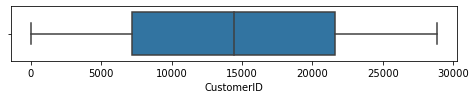

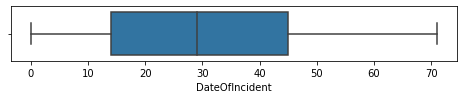

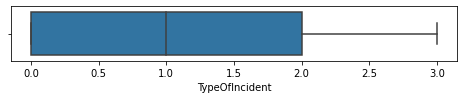

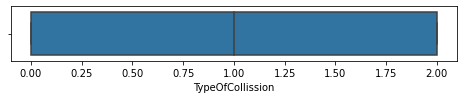

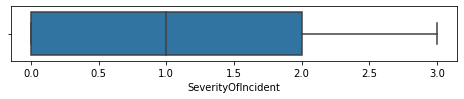

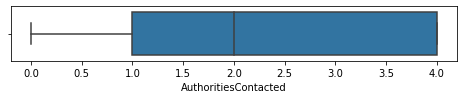

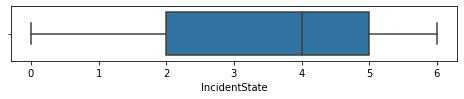

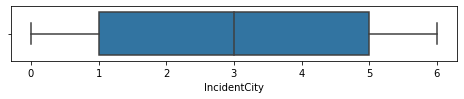

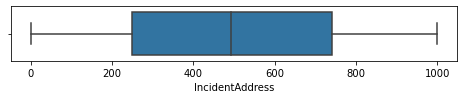

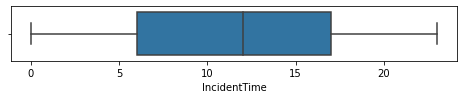

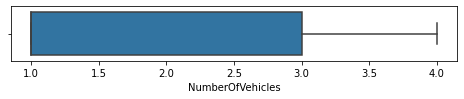

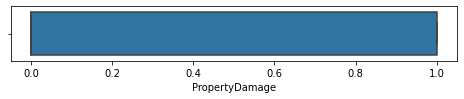

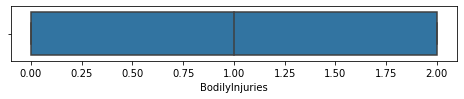

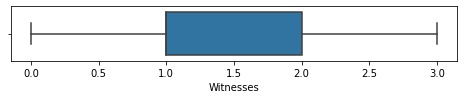

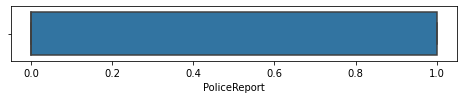

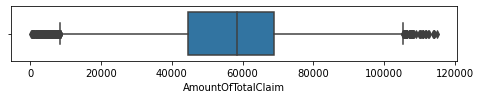

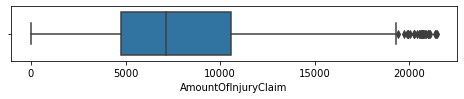

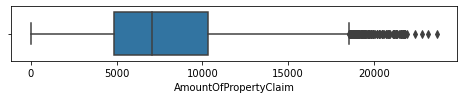

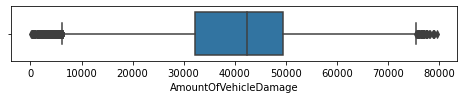

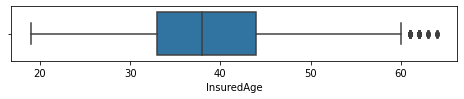

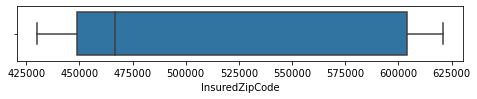

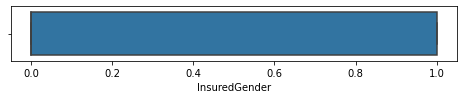

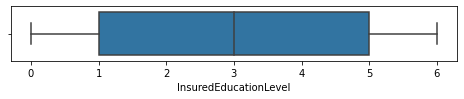

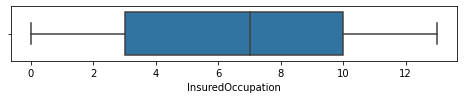

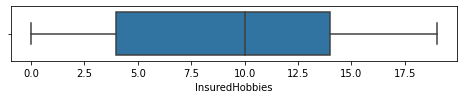

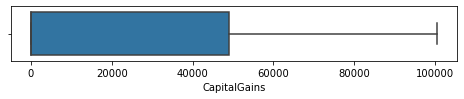

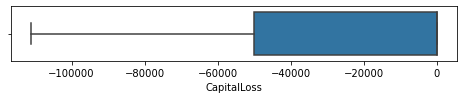

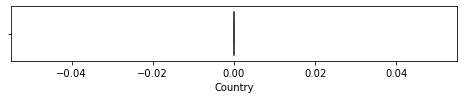

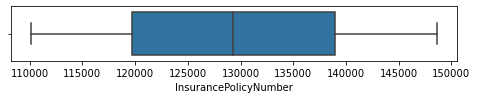

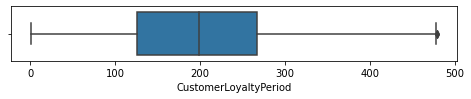

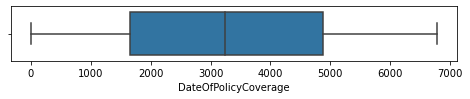

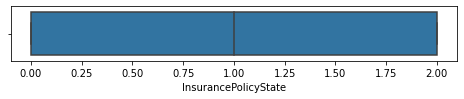

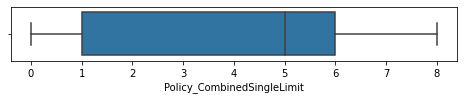

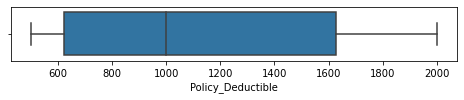

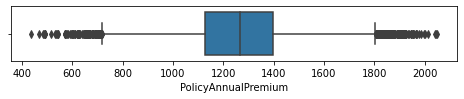

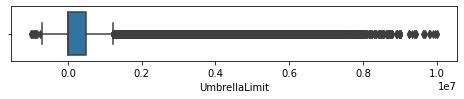

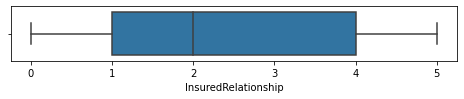

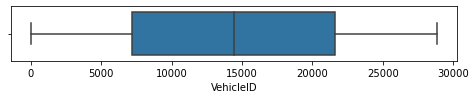

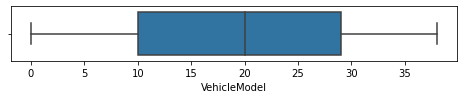

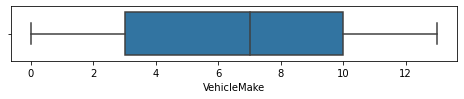

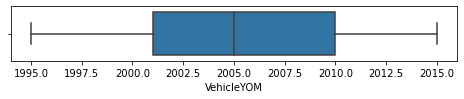

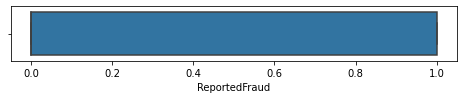

In [117]:
# Loop over each numeric column in the dataframe and create a boxplot
for column in Merge.select_dtypes(include=['float64', 'int32']):
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=Merge[column])
    plt.show()

### Removing Outlier By IQR Method

In [118]:
Q1 = Merge.quantile(0.25)
Q3 = Merge.quantile(0.75)
IQR = Q3 - Q1
Merge = Merge[~((Merge < (Q1 - 1.5 * IQR)) | (Merge > (Q3 + 1.5 * IQR))).any(axis=1)]


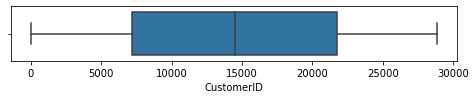

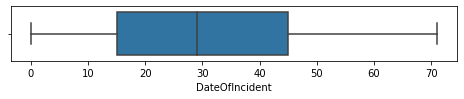

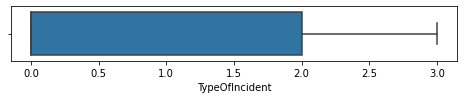

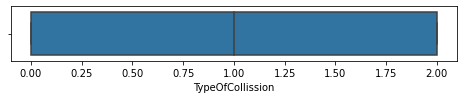

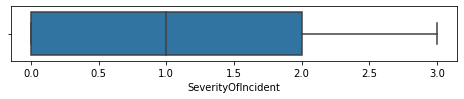

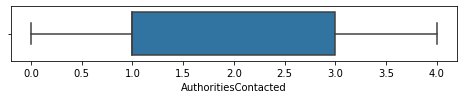

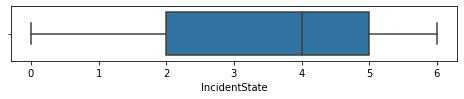

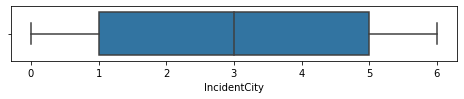

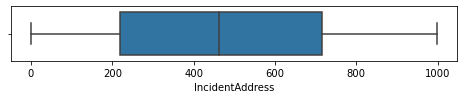

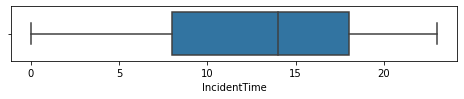

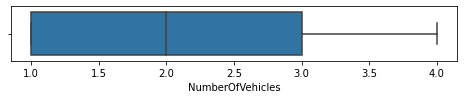

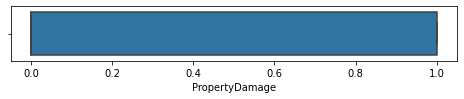

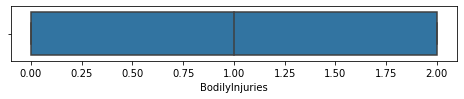

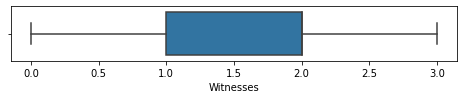

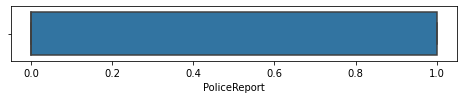

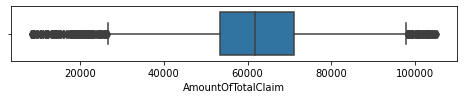

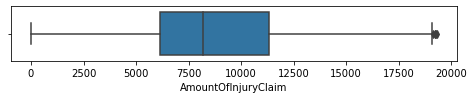

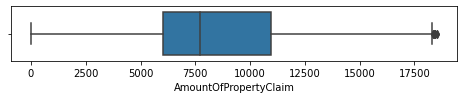

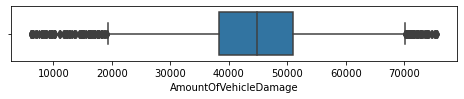

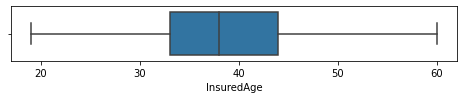

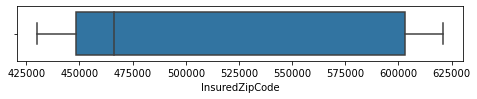

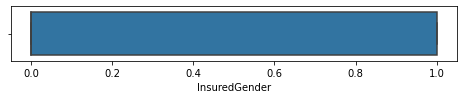

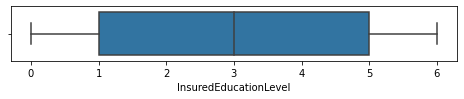

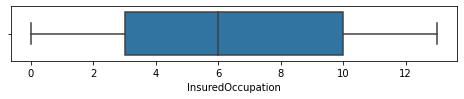

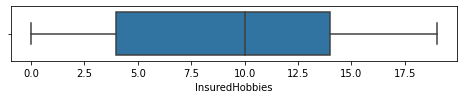

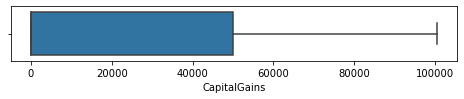

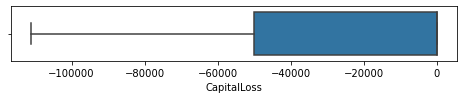

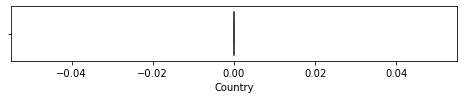

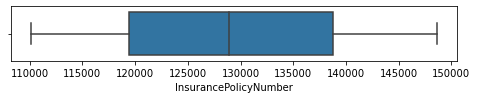

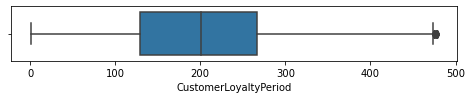

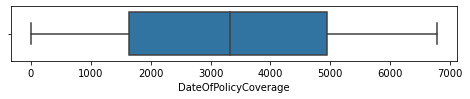

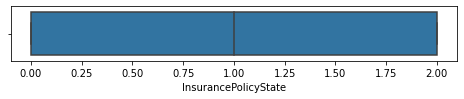

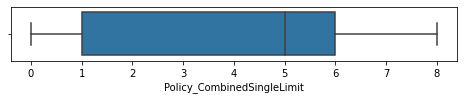

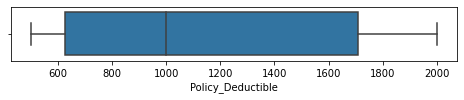

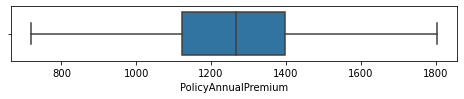

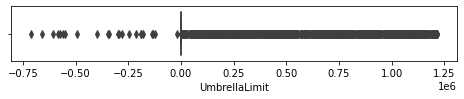

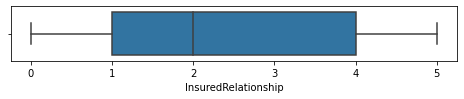

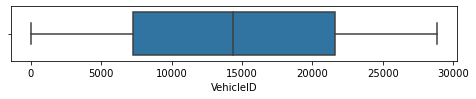

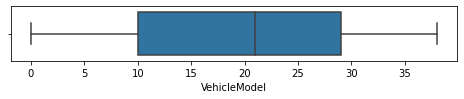

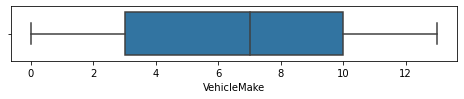

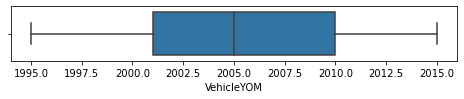

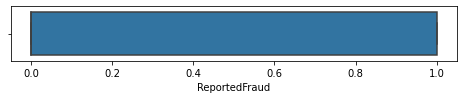

In [119]:
for column in Merge.select_dtypes(include=['float64', 'int32']):
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=Merge[column])
    plt.show()


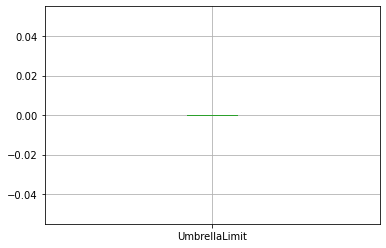

In [120]:
# Calculate the IQR for the 'AmountOfTotalClaim' column
Q1 = Merge['UmbrellaLimit'].quantile(0.25)
Q3 = Merge['UmbrellaLimit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Merge.loc[(Merge['UmbrellaLimit'] < lower_bound) | (Merge['UmbrellaLimit'] > upper_bound)]

# Remove outliers from the 'AmountOfTotalClaim' column
Merge = Merge.loc[(Merge['UmbrellaLimit'] >= lower_bound) & (Merge['UmbrellaLimit'] <= upper_bound)]

# Create a box plot of the 'UmbrellaLimit' column
Merge.boxplot(column='UmbrellaLimit')

# Display the plot
plt.show()

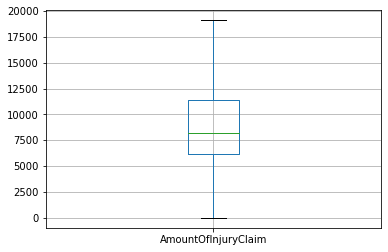

In [121]:
# Calculate the IQR for the 'AmountOfTotalClaim' column
Q1 = Merge['AmountOfInjuryClaim'].quantile(0.25)
Q3 = Merge['AmountOfInjuryClaim'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Merge.loc[(Merge['AmountOfInjuryClaim'] < lower_bound) | (Merge['AmountOfInjuryClaim'] > upper_bound)]

# Remove outliers from the 'AmountOfTotalClaim' column
Merge = Merge.loc[(Merge['AmountOfInjuryClaim'] >= lower_bound) & (Merge['AmountOfInjuryClaim'] <= upper_bound)]

# Create a box plot of the 'UmbrellaLimit' column
Merge.boxplot(column='AmountOfInjuryClaim')

# Display the plot
plt.show()

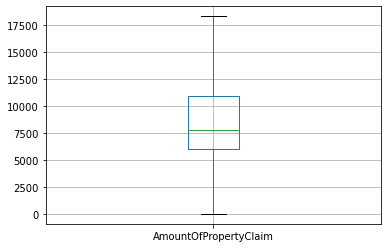

In [122]:
# Calculate the IQR for the 'AmountOfTotalClaim' column
Q1 = Merge['AmountOfPropertyClaim'].quantile(0.25)
Q3 = Merge['AmountOfPropertyClaim'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Merge.loc[(Merge['AmountOfPropertyClaim'] < lower_bound) | (Merge['AmountOfPropertyClaim'] > upper_bound)]

# Remove outliers from the 'AmountOfTotalClaim' column
Merge = Merge.loc[(Merge['AmountOfPropertyClaim'] >= lower_bound) & (Merge['AmountOfPropertyClaim'] <= upper_bound)]

# Create a box plot of the 'UmbrellaLimit' column
Merge.boxplot(column='AmountOfPropertyClaim')

# Display the plot
plt.show()

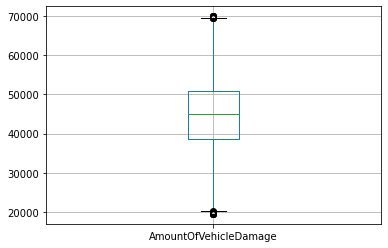

In [123]:
# Calculate the IQR for the 'AmountOfTotalClaim' column
Q1 = Merge['AmountOfVehicleDamage'].quantile(0.25)
Q3 = Merge['AmountOfVehicleDamage'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Merge.loc[(Merge['AmountOfVehicleDamage'] < lower_bound) | (Merge['AmountOfVehicleDamage'] > upper_bound)]

# Remove outliers from the 'AmountOfTotalClaim' column
Merge = Merge.loc[(Merge['AmountOfVehicleDamage'] >= lower_bound) & (Merge['AmountOfVehicleDamage'] <= upper_bound)]

# Create a box plot of the 'UmbrellaLimit' column
Merge.boxplot(column='AmountOfVehicleDamage')

# Display the plot
plt.show()

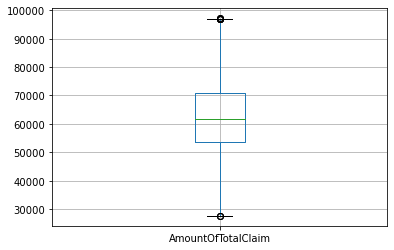

In [124]:
# Calculate the IQR for the 'AmountOfTotalClaim' column
Q1 = Merge['AmountOfTotalClaim'].quantile(0.25)
Q3 = Merge['AmountOfTotalClaim'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Merge.loc[(Merge['AmountOfTotalClaim'] < lower_bound) | (Merge['AmountOfTotalClaim'] > upper_bound)]

# Remove outliers from the 'AmountOfTotalClaim' column
Merge = Merge.loc[(Merge['AmountOfTotalClaim'] >= lower_bound) & (Merge['AmountOfTotalClaim'] <= upper_bound)]

# Create a box plot of the 'UmbrellaLimit' column
Merge.boxplot(column='AmountOfTotalClaim')

# Display the plot
plt.show()

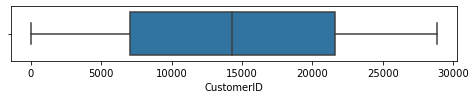

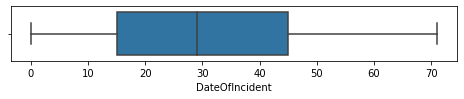

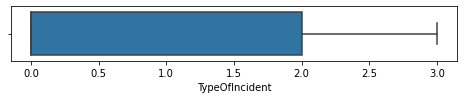

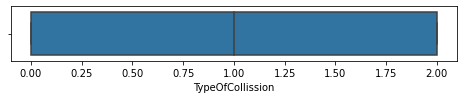

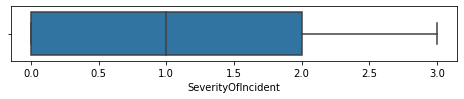

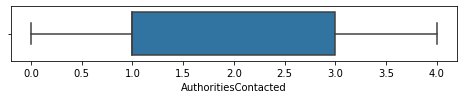

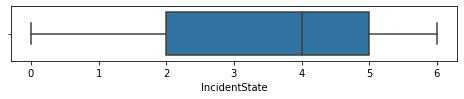

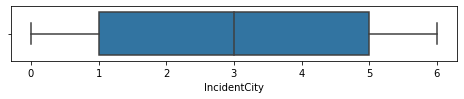

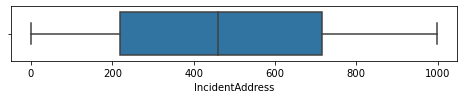

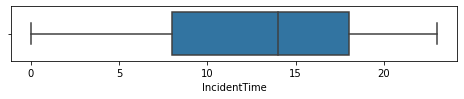

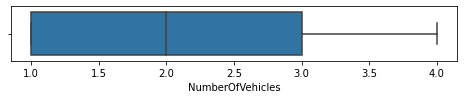

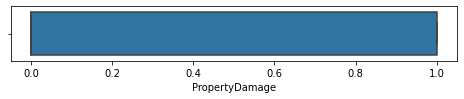

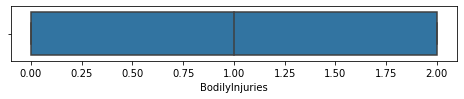

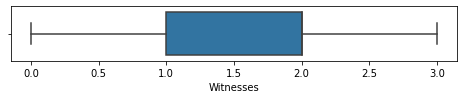

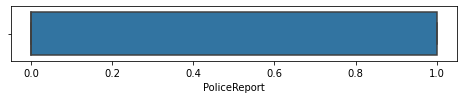

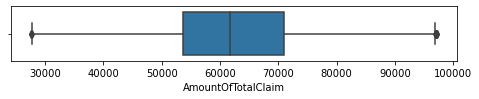

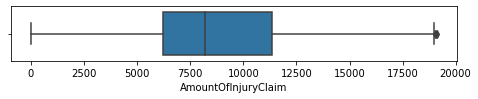

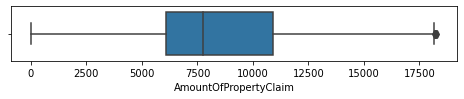

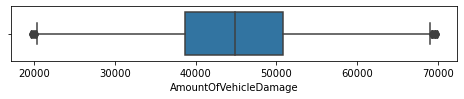

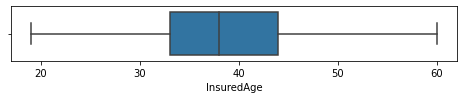

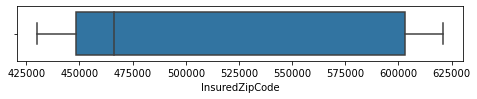

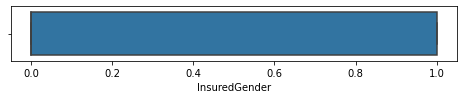

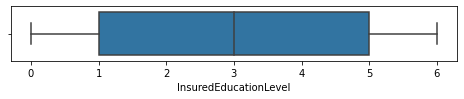

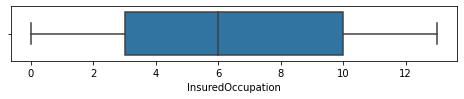

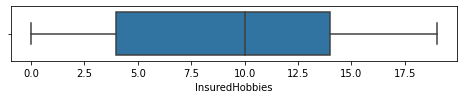

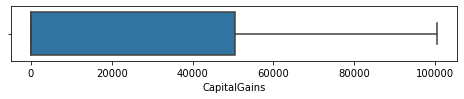

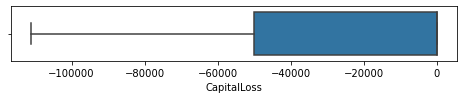

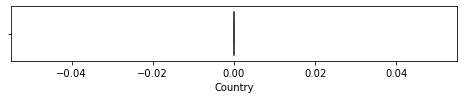

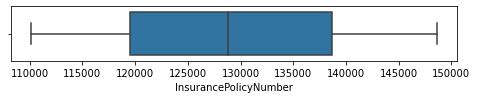

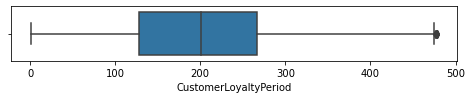

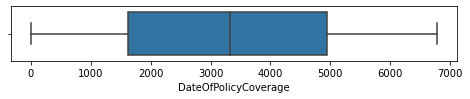

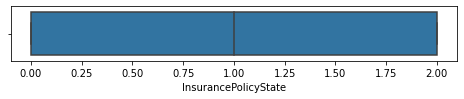

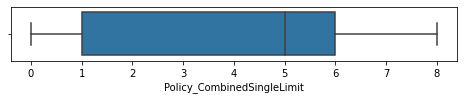

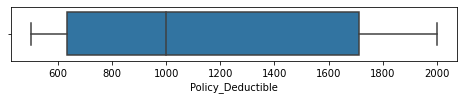

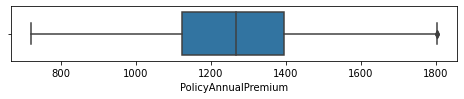

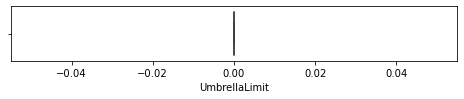

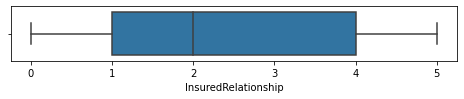

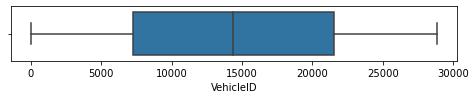

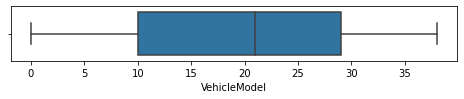

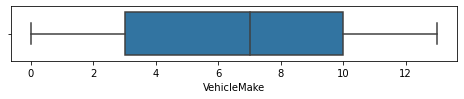

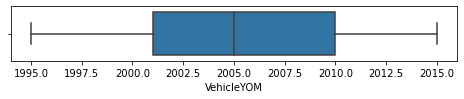

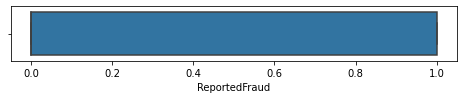

In [125]:
for column in Merge.select_dtypes(include=['float64', 'int32']):
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=Merge[column])
    plt.show()

## Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [127]:
scaler = MinMaxScaler()
model=scaler.fit(Merge[num_att])
Merge[num_att]=model.transform(Merge[num_att])

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(Merge)
print(scaled)

[[-1.71860337  0.19733063 -0.96202488 ... -1.35912658  0.54377753
  -0.62838515]
 [-1.71848335  0.13782428 -0.96202488 ... -1.35912658  0.16735646
  -0.62838515]
 [-1.71836333 -0.93329011  1.03577105 ...  1.59190541 -1.15011726
  -0.62838515]
 ...
 [ 1.74108952 -0.8142774   1.03577105 ...  0.85414741 -1.15011726
  -0.62838515]
 [ 1.74144958  1.14943231  1.03577105 ... -1.11320725 -1.33832779
  -0.62838515]
 [ 1.74180964  0.55436876  1.03577105 ...  0.11638942 -0.39727513
  -0.62838515]]


In [129]:
Merge.shape

(16525, 42)

# ------------------------------------------ Model Building -------------------------------------------

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X=Merge.drop(['ReportedFraud'],axis=1)#indepentent variables
Y=Merge['ReportedFraud']#dependentent varialble

In [132]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3344)

In [133]:
print("Training set shape:", X_train.shape, Y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (13220, 41) (13220,)
Test set shape: (3305, 41) (3305,)


In [134]:
Scores=pd.DataFrame(columns=['Model','Train_F1_Score','Test_F1_Score'])

In [135]:
def F1_Scores(y_train_act,y_train_pred,y_test_act,y_test_pred,model_description,dataframe):
    train_f1score  = f1_score(y_train_act,y_train_pred)
    test_f1score  = f1_score(y_test_act,y_test_pred)
    dataframe = dataframe.append(pd.Series([model_description,train_f1score,test_f1score],
                                           index=Scores.columns ), ignore_index=True)
    return(dataframe)

## 1.SMOTE (class imbalance)

In [68]:
#import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE(random_state = 2)
X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))

After OverSampling, the shape of train_X: (16632, 41)
After OverSampling, the shape of train_y: (16632,) 

After OverSampling, counts of label '1': 8316
After OverSampling, counts of label '0': 8316


## 2. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [71]:
LogReg = LogisticRegression()

In [72]:
LogReg.fit(X_train,Y_train)

LogisticRegression()

In [73]:
y_train_predLogReg=LogReg.predict(X_train)
y_test_predLogReg=LogReg.predict(x_test)

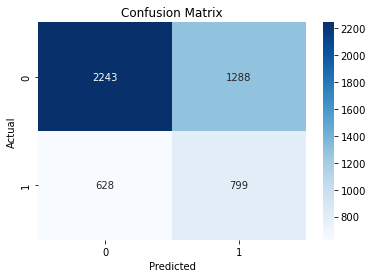

Accuracy: 0.6135538523598225


In [74]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
cm = confusion_matrix(y_test, y_test_predLogReg)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)


In [75]:
print(classification_report(Y_train,y_train_predLogReg))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      8316
           1       0.61      0.58      0.60      8316

    accuracy                           0.61     16632
   macro avg       0.61      0.61      0.61     16632
weighted avg       0.61      0.61      0.61     16632



In [76]:
print(classification_report(y_test, y_test_predLogReg))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      3531
           1       0.38      0.56      0.45      1427

    accuracy                           0.61      4958
   macro avg       0.58      0.60      0.58      4958
weighted avg       0.67      0.61      0.63      4958



In [77]:
Scores = F1_Scores(Y_train,y_train_predLogReg,y_test,y_test_predLogReg,"Logistic Regression",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  Logistic Regression        0.599199       0.454752

In [78]:
from mlxtend.plotting import plot_learning_curves

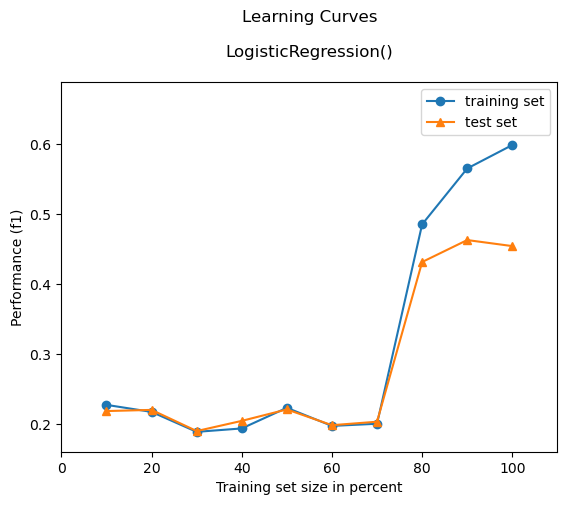

In [79]:
plot_learning_curves(X_train,Y_train,x_test,y_test,LogReg,scoring='f1')
plt.show()

## 3. LOGISTIC REGRESSION WITH L1 LASSO

In [80]:
LogReg1 = LogisticRegression(C=0.1, penalty='l1',solver='saga')
LogReg1

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [81]:
LogReg1.fit(X_train,Y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [82]:
y_train_predLogReg1=LogReg1.predict(X_train)
y_test_predLogReg1=LogReg1.predict(x_test)

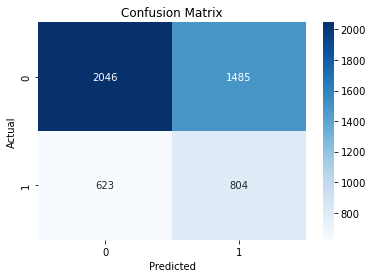

Accuracy: 0.5748285599031868


In [83]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_test_predLogReg1)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [84]:
print(classification_report(Y_train,y_train_predLogReg1))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      8316
           1       0.59      0.58      0.58      8316

    accuracy                           0.59     16632
   macro avg       0.59      0.59      0.59     16632
weighted avg       0.59      0.59      0.59     16632



In [85]:
print(classification_report(y_test,y_test_predLogReg1))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      3531
           1       0.35      0.56      0.43      1427

    accuracy                           0.57      4958
   macro avg       0.56      0.57      0.55      4958
weighted avg       0.65      0.57      0.59      4958



In [86]:
Scores = F1_Scores(Y_train,y_train_predLogReg1,y_test,y_test_predLogReg1,"Lasso",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  Logistic Regression        0.599199       0.454752
1                Lasso        0.584539       0.432723

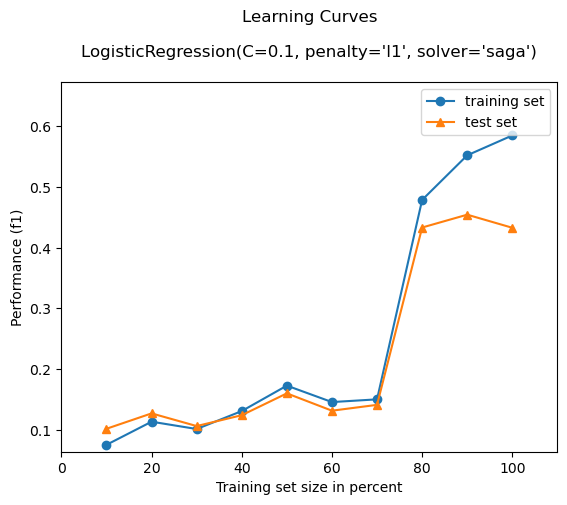

In [87]:
plot_learning_curves(X_train,Y_train,x_test,y_test,LogReg1,scoring='f1')
plt.show()

## 4. Logistic Regression L2 RIDGE

In [88]:
LogReg2 = LogisticRegression(C=0.01, penalty='l2',solver='saga')
LogReg2

LogisticRegression(C=0.01, solver='saga')

In [89]:
LogReg2.fit(X_train,Y_train)

LogisticRegression(C=0.01, solver='saga')

In [90]:
y_train_predLogReg2=LogReg2.predict(X_train)
y_test_predLogReg2=LogReg2.predict(x_test)

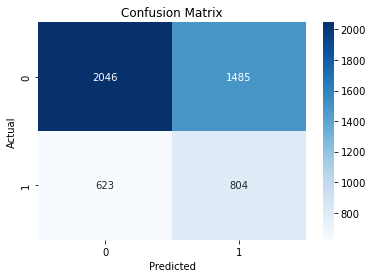

Accuracy: 0.5748285599031868


In [91]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_test_predLogReg2)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [92]:
print(classification_report(Y_train,y_train_predLogReg2))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      8316
           1       0.59      0.58      0.58      8316

    accuracy                           0.59     16632
   macro avg       0.59      0.59      0.59     16632
weighted avg       0.59      0.59      0.59     16632



In [93]:
print(classification_report(y_test,y_test_predLogReg2))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      3531
           1       0.35      0.56      0.43      1427

    accuracy                           0.57      4958
   macro avg       0.56      0.57      0.55      4958
weighted avg       0.65      0.57      0.59      4958



In [94]:
Scores = F1_Scores(Y_train,y_train_predLogReg2,y_test,y_test_predLogReg2,"Ridge",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  Logistic Regression        0.599199       0.454752
1                Lasso        0.584539       0.432723
2                Ridge        0.584625       0.432723

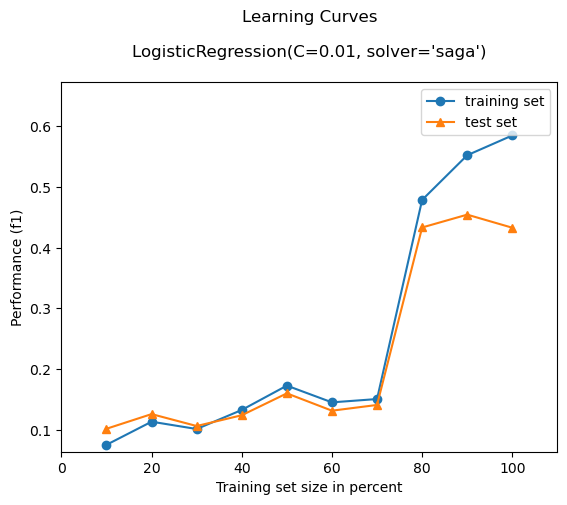

In [95]:
plot_learning_curves(X_train,Y_train,x_test,y_test,LogReg2,scoring='f1')
plt.show()

## 5. KNN(K nearest nieghbour)

In [96]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [97]:
knn_model.fit(X_train,Y_train)
y_train_predKnn = knn_model.predict(X_train)

In [98]:
y_test_predKnn=knn_model.predict(x_test)

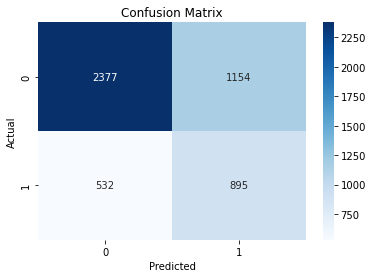

Accuracy: 0.6599435256151674


In [99]:
from sklearn.metrics import confusion_matrix

# get the confusion matrix
cm = confusion_matrix(y_test,y_test_predKnn)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [100]:
Scores = F1_Scores(Y_train,y_train_predKnn,y_test,y_test_predKnn,"KNN",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  Logistic Regression        0.599199       0.454752
1                Lasso        0.584539       0.432723
2                Ridge        0.584625       0.432723
3                  KNN        0.870915       0.514960

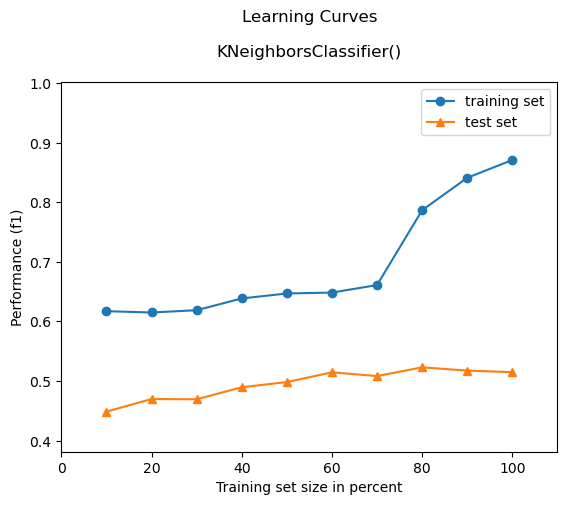

In [101]:
plot_learning_curves(X_train,Y_train,x_test,y_test,knn_model,scoring='f1')
plt.show()

## 6. Desicion trees

In [102]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=3344)

In [103]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=3344)

In [104]:
y_train_predDec=DT.predict(X_train)
y_test_predDec=DT.predict(x_test)

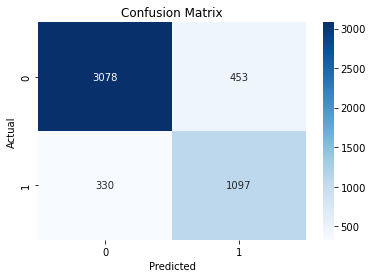

Accuracy: 0.8420734167002824


In [105]:
# get the confusion matrix
cm = confusion_matrix(y_test,y_test_predDec)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [106]:
print(classification_report(Y_train,y_train_predDec))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8316
           1       1.00      1.00      1.00      8316

    accuracy                           1.00     16632
   macro avg       1.00      1.00      1.00     16632
weighted avg       1.00      1.00      1.00     16632



In [107]:
print(classification_report(Y_train,y_train_predDec))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8316
           1       1.00      1.00      1.00      8316

    accuracy                           1.00     16632
   macro avg       1.00      1.00      1.00     16632
weighted avg       1.00      1.00      1.00     16632



In [108]:
Scores = F1_Scores(Y_train,y_train_predDec,y_test,y_test_predDec,"Decision",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  Logistic Regression        0.599199       0.454752
1                Lasso        0.584539       0.432723
2                Ridge        0.584625       0.432723
3                  KNN        0.870915       0.514960
4             Decision        1.000000       0.736984

## Hyperparameter Tuning

In [109]:
# gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
# gridsearch.fit(X_train,Y_train)
# GridSearchCV(cv=5, error_score='raise',
#        estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0
#                                    loss='linear', n_estimators=50, random_state=4433),
#        fit_params=None, iid=True, n_jobs=1,
#        param_grid={'n_estimators': [50, 100], 
#                    'learning_rate': [0.01, 0.05, 0.1, 0.5], 
#                    'loss': ['linear', 'square', 'exponential']},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#        scoring=None, verbose=0) 

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid={'max_depth':[5, 6, 7, 8],'max_features': ['auto', 'sqrt', 'log2'],'ccp_alpha': [0.1, .01, .001],
            'min_samples_split':[1,9,11,12],
           'min_samples_leaf':[1,3,7,9],
           'criterion':['gini', 'entropy']}


tree_class = DecisionTreeClassifier(random_state=4433)
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_leaf=9, min_samples_split=9,
                       random_state=4433)

In [112]:
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_leaf=9, min_samples_split=9,
                       random_state=4433)

In [113]:
DT1.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_leaf=9, min_samples_split=9,
                       random_state=4433)

In [114]:
y_train_predDec1=DT1.predict(X_train)
y_test_predDec1=DT1.predict(x_test)

In [115]:
print(classification_report(Y_train,y_train_predDec1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8316
           1       0.89      0.81      0.85      8316

    accuracy                           0.86     16632
   macro avg       0.86      0.86      0.86     16632
weighted avg       0.86      0.86      0.86     16632



In [116]:
print(classification_report(Y_train,y_train_predDec1))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8316
           1       0.89      0.81      0.85      8316

    accuracy                           0.86     16632
   macro avg       0.86      0.86      0.86     16632
weighted avg       0.86      0.86      0.86     16632



In [117]:
Scores = F1_Scores(Y_train,y_train_predDec1,y_test,y_test_predDec1,"Decision after hyperparmeter",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0           Logistic Regression        0.599199       0.454752
1                         Lasso        0.584539       0.432723
2                         Ridge        0.584625       0.432723
3                           KNN        0.870915       0.514960
4                      Decision        1.000000       0.736984
5  Decision after hyperparmeter        0.850460       0.725236

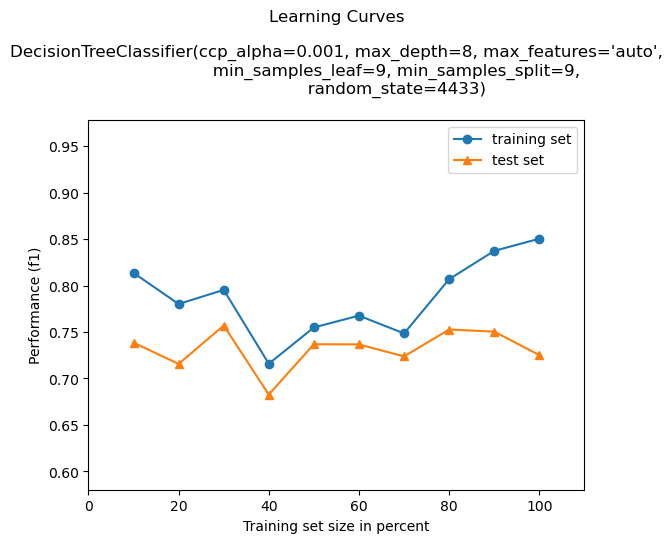

In [118]:
plot_learning_curves(X_train,Y_train,x_test,y_test,DT1,scoring='f1')
plt.show()

## 7.Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier() 

In [137]:
modelRF.fit(X_train, Y_train)
Y_train_predRF=modelRF.predict(X_train)
y_test_predRF=modelRF.predict(x_test)

In [138]:
print(classification_report(Y_train,Y_train_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9516
           1       1.00      1.00      1.00      3704

    accuracy                           1.00     13220
   macro avg       1.00      1.00      1.00     13220
weighted avg       1.00      1.00      1.00     13220



In [139]:
print(classification_report(y_test,y_test_predRF))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2331
           1       0.95      0.81      0.87       974

    accuracy                           0.93      3305
   macro avg       0.94      0.89      0.91      3305
weighted avg       0.93      0.93      0.93      3305



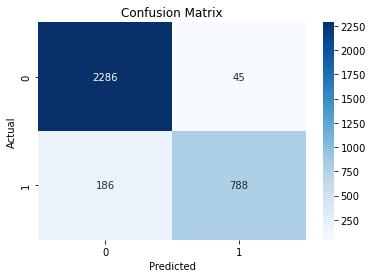

Accuracy: 0.9301059001512859


In [140]:
# get the confusion matrix
cm = confusion_matrix(y_test,y_test_predRF)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [141]:
Scores = F1_Scores(Y_train,Y_train_predRF,y_test,y_test_predRF,"RandomForest",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0  RandomForest             1.0       0.872164

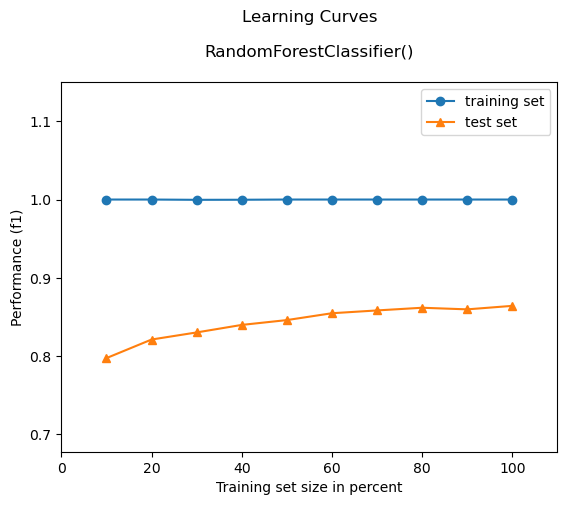

In [125]:
plot_learning_curves(X_train,Y_train,x_test,y_test,modelRF,scoring='f1')
plt.show()

## 8.SVM

In [126]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [127]:
classes = 2
X_train, Y_train = make_classification(100, 5, n_classes=classes, random_state=80, n_informative=2, n_clusters_per_class=1)

X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)
model_svm = svm.SVC(kernel='linear', random_state=0)
model_svm.fit(X_train, Y_train)

Y_train_predsvm = model_svm.predict(X_train)
y_test_predsvm = model_svm.predict(x_test)


In [128]:
print(classification_report(Y_train,Y_train_predsvm))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.93      0.90      0.92        42

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [129]:
print(classification_report(y_test,y_test_predsvm))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



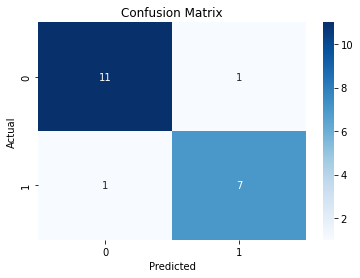

Accuracy: 0.9


In [130]:
# get the confusion matrix
cm = confusion_matrix(y_test,y_test_predsvm)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [131]:
Scores = F1_Scores(Y_train,Y_train_predsvm,y_test,y_test_predsvm,"SVM",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0           Logistic Regression        0.599199       0.454752
1                         Lasso        0.584539       0.432723
2                         Ridge        0.584625       0.432723
3                           KNN        0.870915       0.514960
4                      Decision        1.000000       0.736984
5  Decision after hyperparmeter        0.850460       0.725236
6                  RandomForest        1.000000       0.867434
7                           SVM        0.915663       0.875000

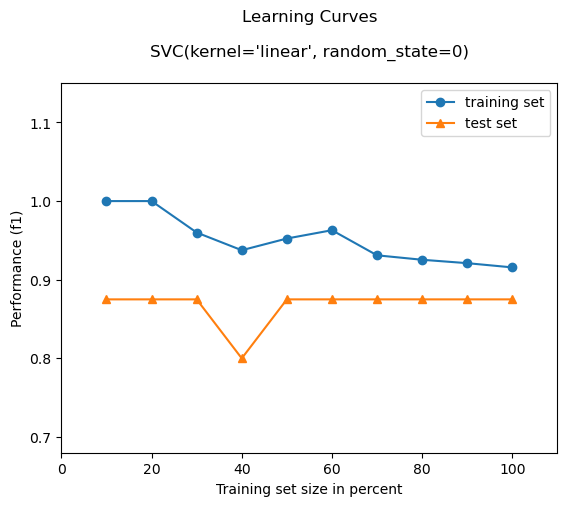

In [132]:
plot_learning_curves(X_train, Y_train, x_test, y_test, model_svm, scoring='f1')
plt.show()


## 9. ANN

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [134]:
model = Sequential()
model.add(Dense(16, input_dim=(X_train.shape[1])))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
opt = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='hinge',metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [136]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [137]:
model_history=model.fit(X_train,Y_train,epochs=32,batch_size=60)

Epoch 1/32
2/2 [==============================] - 1s 8ms/step - loss: 0.9569 - accuracy: 0.5125
Epoch 2/32
2/2 [==============================] - 0s 0s/step - loss: 0.9262 - accuracy: 0.5125
Epoch 3/32
2/2 [==============================] - 0s 0s/step - loss: 0.9103 - accuracy: 0.4750
Epoch 4/32
2/2 [==============================] - 0s 0s/step - loss: 0.8317 - accuracy: 0.5125
Epoch 5/32
2/2 [==============================] - 0s 6ms/step - loss: 0.8506 - accuracy: 0.4750
Epoch 6/32
2/2 [==============================] - 0s 8ms/step - loss: 0.7360 - accuracy: 0.5375
Epoch 7/32
2/2 [==============================] - 0s 8ms/step - loss: 0.7295 - accuracy: 0.5250
Epoch 8/32
2/2 [==============================] - 0s 10ms/step - loss: 0.6192 - accuracy: 0.5625
Epoch 9/32
2/2 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6250
Epoch 10/32
2/2 [==============================] - 0s 0s/step - loss: 0.5947 - accuracy: 0.6500
Epoch 11/32
2/2 [=========================

In [138]:
Scores = F1_Scores(Y_train,Y_train_predsvm,y_test,y_test_predsvm,"ANN",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0           Logistic Regression        0.599199       0.454752
1                         Lasso        0.584539       0.432723
2                         Ridge        0.584625       0.432723
3                           KNN        0.870915       0.514960
4                      Decision        1.000000       0.736984
5  Decision after hyperparmeter        0.850460       0.725236
6                  RandomForest        1.000000       0.867434
7                           SVM        0.915663       0.875000
8                           ANN        0.915663       0.875000

## 10. Xgboost

In [139]:
# pip show xgboost
#!pip3 install xgboost

In [140]:
# /from xgboost import XGBClassifier
import xgboost as xgb
exgb_classifier = xgb.XGBClassifier()
exgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [141]:
Y_train_predXg=exgb_classifier.predict(X_train)
y_test_predsXg=exgb_classifier.predict(x_test)

In [142]:
print(classification_report(Y_train,Y_train_predXg))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        42

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [143]:
print(classification_report(y_test,y_test_predsXg))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



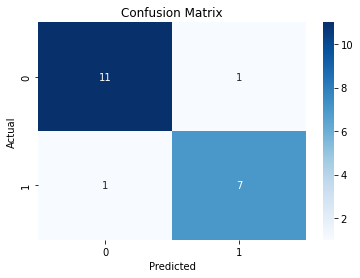

Accuracy: 0.9


In [144]:
# get the confusion matrix
cm = confusion_matrix(y_test,y_test_predsXg)

# calculate the accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)

In [145]:
Scores = F1_Scores(Y_train,Y_train_predXg,y_test,y_test_predsXg,"Xg Boost",Scores)
Scores

Model  Train_F1_Score  Test_F1_Score
0           Logistic Regression        0.599199       0.454752
1                         Lasso        0.584539       0.432723
2                         Ridge        0.584625       0.432723
3                           KNN        0.870915       0.514960
4                      Decision        1.000000       0.736984
5  Decision after hyperparmeter        0.850460       0.725236
6                  RandomForest        1.000000       0.867434
7                           SVM        0.915663       0.875000
8                           ANN        0.915663       0.875000
9                      Xg Boost        0.987952       0.875000

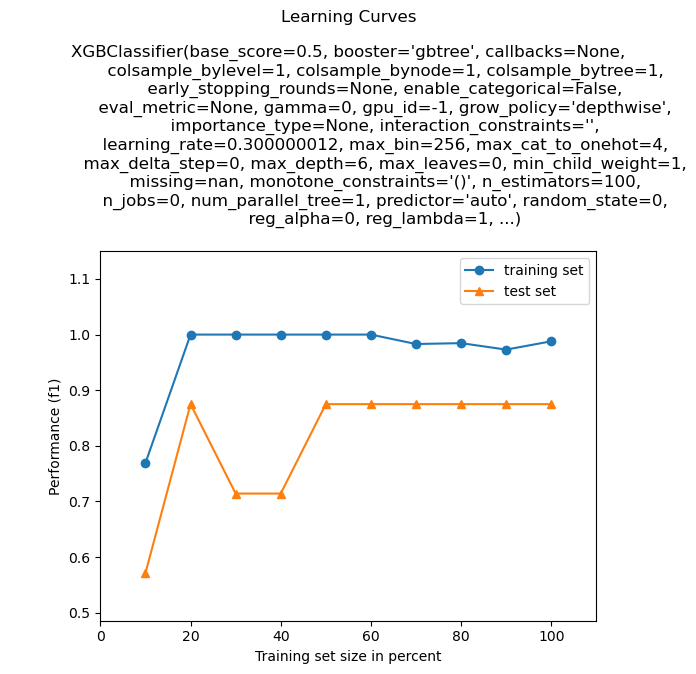

In [146]:
plot_learning_curves(X_train, Y_train, x_test, y_test, exgb_classifier, scoring='f1')
plt.show()

# ------------------------------------[ TEST DATASET  ]-------------------------------------------

## Read the data

In [144]:
Test_Claim=pd.read_csv('Test_Claim.csv',na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])
Test_Claim

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0     Cust10008     2015-02-05   Multi-vehicle Collision  Front Collision   
1     Cust10010     2015-01-13  Single Vehicle Collision   Rear Collision   
2     Cust10015     2015-01-05   Multi-vehicle Collision   Rear Collision   
3     Cust10020     2015-01-03             Vehicle Theft              NaN   
4      Cust1003     2015-02-22   Multi-vehicle Collision   Rear Collision   
...         ...            ...                       ...              ...   
8907   Cust9984     2015-01-17  Single Vehicle Collision   Rear Collision   
8908   Cust9986     2015-02-09  Single Vehicle Collision  Front Collision   
8909   Cust9990     2015-02-20  Single Vehicle Collision   Rear Collision   
8910   Cust9995     2015-02-22  Single Vehicle Collision   Side Collision   
8911   Cust9998     2015-01-14  Single Vehicle Collision  Front Collision   

     SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0          Minor Damage            Ambulance        State5        City2   
1          Minor Damage                 Fire        State9        City5   
2          Minor Damage               Police        State5        City2   
3        Trivial Damage                 None        State7        City5   
4          Minor Damage               Police        State5        City2   
...                 ...                  ...           ...          ...   
8907         Total Loss               Police        State5        City4   
8908         Total Loss                Other        State5        City2   
8909       Minor Damage                Other        State5        City2   
8910       Minor Damage               Police        State8        City3   
8911         Total Loss                Other        State7        City3   

     IncidentAddress  IncidentTime  NumberOfVehicles PropertyDamage  \
0      Location 1354           4.0                 3             NO   
1      Location 1383          16.0                 1            NaN   
2      Location 2030          20.0                 3             NO   
3      Location 1449          10.0                 1            NaN   
4      Location 1916           7.0                 3             NO   
...              ...           ...               ...            ...   
8907   Location 1958          10.0                 1            YES   
8908   Location 1035          19.0                 1            NaN   
8909   Location 2037           9.0                 1            YES   
8910   Location 2097          19.0                 1            YES   
8911   Location 1024          10.0                 1            NaN   

      BodilyInjuries  Witnesses PoliceReport  AmountOfTotalClaim  \
0                  0        0.0          NaN             68354.0   
1                  1        1.0          NaN             55270.0   
2                  0        1.0          NaN             59515.0   
3                  2        1.0          NaN              4941.0   
4                  2        3.0           NO             34650.0   
...              ...        ...          ...                 ...   
8907               1        0.0           NO             61296.0   
8908               1        1.0          YES             86729.0   
8909               1        2.0           NO             65328.0   
8910               0        2.0          YES             71118.0   
8911               2        2.0          NaN             67499.0   

      AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfVehicleDamage  
0                    6835                   8059                  53460  
1                    8113                   5240                  41917  
2                    7490                   9110                  42915  
3                     494                    866                   3581  
4                    7700                   3850                  23100  
...                   ...                    ...                 

In [145]:
Test_Claim.shape

(8912, 19)

In [146]:
Test_Demographics=pd.read_csv('Test_Demographics.csv',na_values=['NA'])

In [147]:
Test_Demographics.shape

(8912, 10)

In [148]:
Test_Policy=pd.read_csv('Test_Policy.csv',na_values=['NA','-1','MISSINGVAL'])

In [149]:
Test_Policy.shape

(8912, 10)

In [150]:
Test_Vehicle=pd.read_csv('Test_Vehicle.csv',na_values=['???'])

In [151]:
Test_Vehicle

CustomerID VehicleAttribute VehicleAttributeDetails
0      Cust28465     VehicleModel                     92x
1      Cust20319     VehicleModel                   Jetta
2       Cust3683        VehicleID            Vehicle22709
3      Cust29385        VehicleID            Vehicle20347
4      Cust34403     VehicleModel                   Camry
...          ...              ...                     ...
35643   Cust1980     VehicleModel                      95
35644  Cust17773     VehicleModel               Silverado
35645  Cust24313        VehicleID            Vehicle33407
35646   Cust5061       VehicleYOM                    2003
35647  Cust13782      VehicleMake               Chevrolet

[35648 rows x 3 columns]

In [152]:
Test_Vehicle.shape

(35648, 3)

In [153]:
Test_Vehicle.nunique()

CustomerID                 8912
VehicleAttribute              4
VehicleAttributeDetails    8985
dtype: int64

In [154]:
Test=pd.read_csv('Test.csv',na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])

In [155]:
Test.shape

(8912, 1)

In [156]:
VehicleID=pd.DataFrame(columns=["CustomerID","VehicleID"])
VehicleModel=pd.DataFrame(columns=["CustomerID","VehicleModel"])
VehicleMake=pd.DataFrame(columns=["CustomerID","VehicleMake"])
VehicleYOM=pd.DataFrame(columns=["CustomerID","VehicleYOM"])
for i in Test_Vehicle['VehicleAttribute'].unique():
    emptydf=Test_Vehicle[Test_Vehicle["VehicleAttribute"]==i][['CustomerID','VehicleAttributeDetails']]
    emptydf.columns=["CustomerID",i]
    if(i=="VehicleID"):
        VehicleID=VehicleID.append(emptydf) 
    elif(i=="VehicleModel"):
        VehicleModel=VehicleModel.append(emptydf)
    elif(i=="VehicleMake"):
        VehicleMake=VehicleMake.append(emptydf)
    else:
        VehicleYOM=VehicleYOM.append(emptydf)

In [157]:
Test_Vehicle=pd.merge(VehicleID,pd.merge(VehicleModel,pd.merge(VehicleMake,VehicleYOM)))

In [158]:
Test_Vehicle.shape

(8912, 5)

In [159]:
Test_Vehicle

CustomerID     VehicleID    VehicleModel VehicleMake VehicleYOM
0      Cust3683  Vehicle22709           ML350        Audi       1997
1     Cust29385  Vehicle20347  Grand Cherokee      Suburu       2003
2     Cust23669  Vehicle33702           Jetta  Volkswagen       2002
3     Cust30303   Vehicle2549           ML350    Mercedes       2009
4     Cust16417  Vehicle17131          Legacy  Volkswagen       1999
...         ...           ...             ...         ...        ...
8907  Cust10374  Vehicle29321             RAM       Dodge       2004
8908   Cust4635  Vehicle24404            C300      Accura       2011
8909  Cust33915  Vehicle24485            C300    Mercedes       2012
8910  Cust21696  Vehicle32150             MDX        Audi       2000
8911  Cust24313  Vehicle33407          Passat  Volkswagen       2010

[8912 rows x 5 columns]

## Merging

In [160]:
# merging dataframe using multiple keys
Merge_test= pd.merge(Test_Claim,pd.merge(Test_Demographics,pd.merge(Test_Policy,pd.merge(Test_Vehicle,Test))))

In [161]:
Merge_test

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0     Cust10008     2015-02-05   Multi-vehicle Collision  Front Collision   
1     Cust10010     2015-01-13  Single Vehicle Collision   Rear Collision   
2     Cust10015     2015-01-05   Multi-vehicle Collision   Rear Collision   
3     Cust10020     2015-01-03             Vehicle Theft              NaN   
4      Cust1003     2015-02-22   Multi-vehicle Collision   Rear Collision   
...         ...            ...                       ...              ...   
8907   Cust9984     2015-01-17  Single Vehicle Collision   Rear Collision   
8908   Cust9986     2015-02-09  Single Vehicle Collision  Front Collision   
8909   Cust9990     2015-02-20  Single Vehicle Collision   Rear Collision   
8910   Cust9995     2015-02-22  Single Vehicle Collision   Side Collision   
8911   Cust9998     2015-01-14  Single Vehicle Collision  Front Collision   

     SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0          Minor Damage            Ambulance        State5        City2   
1          Minor Damage                 Fire        State9        City5   
2          Minor Damage               Police        State5        City2   
3        Trivial Damage                 None        State7        City5   
4          Minor Damage               Police        State5        City2   
...                 ...                  ...           ...          ...   
8907         Total Loss               Police        State5        City4   
8908         Total Loss                Other        State5        City2   
8909       Minor Damage                Other        State5        City2   
8910       Minor Damage               Police        State8        City3   
8911         Total Loss                Other        State7        City3   

     IncidentAddress  IncidentTime  ...  InsurancePolicyState  \
0      Location 1354           4.0  ...                State2   
1      Location 1383          16.0  ...                State3   
2      Location 2030          20.0  ...                State2   
3      Location 1449          10.0  ...                State3   
4      Location 1916           7.0  ...                State3   
...              ...           ...  ...                   ...   
8907   Location 1958          10.0  ...                State3   
8908   Location 1035          19.0  ...                State2   
8909   Location 2037           9.0  ...                State2   
8910   Location 2097          19.0  ...                State2   
8911   Location 1024          10.0  ...                State2   

     Policy_CombinedSingleLimit  Policy_Deductible  PolicyAnnualPremium  \
0                      500/1000               2000              1006.00   
1                       100/300                500              1279.17   
2                       250/500               1000              1454.67   
3                       500/500               2000              1287.76   
4                       100/300               2000              1413.14   
...                         ...                ...                  ...   
8907                   500/1000                673              1104.02   
8908                    250/500                574               961.46   
8909                    100/300               1216              1560.49   
8910                    100/300               1950              1577.48   
8911                   500/1000               2000               928.75   

     UmbrellaLimit  InsuredRelationship     VehicleID    VehicleModel  \
0                0            own-child  Vehicle34362          Passat   
1                0            unmarried  Vehicle17046          Ultima   
2          1235986       other-relative  Vehicle11038         Impreza   
3          5873212                 wife  Vehicle37114              TL   
4          5000000            own-child  Vehicle16771             RAM   
...            ...                  ...           ...      

In [162]:
Merge_test.shape

(8912, 41)

In [163]:
Merge_test.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleModel', 'VehicleMake', 'VehicleYOM'],
      dtype='object')

In [164]:
Merge_test

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0     Cust10008     2015-02-05   Multi-vehicle Collision  Front Collision   
1     Cust10010     2015-01-13  Single Vehicle Collision   Rear Collision   
2     Cust10015     2015-01-05   Multi-vehicle Collision   Rear Collision   
3     Cust10020     2015-01-03             Vehicle Theft              NaN   
4      Cust1003     2015-02-22   Multi-vehicle Collision   Rear Collision   
...         ...            ...                       ...              ...   
8907   Cust9984     2015-01-17  Single Vehicle Collision   Rear Collision   
8908   Cust9986     2015-02-09  Single Vehicle Collision  Front Collision   
8909   Cust9990     2015-02-20  Single Vehicle Collision   Rear Collision   
8910   Cust9995     2015-02-22  Single Vehicle Collision   Side Collision   
8911   Cust9998     2015-01-14  Single Vehicle Collision  Front Collision   

     SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0          Minor Damage            Ambulance        State5        City2   
1          Minor Damage                 Fire        State9        City5   
2          Minor Damage               Police        State5        City2   
3        Trivial Damage                 None        State7        City5   
4          Minor Damage               Police        State5        City2   
...                 ...                  ...           ...          ...   
8907         Total Loss               Police        State5        City4   
8908         Total Loss                Other        State5        City2   
8909       Minor Damage                Other        State5        City2   
8910       Minor Damage               Police        State8        City3   
8911         Total Loss                Other        State7        City3   

     IncidentAddress  IncidentTime  ...  InsurancePolicyState  \
0      Location 1354           4.0  ...                State2   
1      Location 1383          16.0  ...                State3   
2      Location 2030          20.0  ...                State2   
3      Location 1449          10.0  ...                State3   
4      Location 1916           7.0  ...                State3   
...              ...           ...  ...                   ...   
8907   Location 1958          10.0  ...                State3   
8908   Location 1035          19.0  ...                State2   
8909   Location 2037           9.0  ...                State2   
8910   Location 2097          19.0  ...                State2   
8911   Location 1024          10.0  ...                State2   

     Policy_CombinedSingleLimit  Policy_Deductible  PolicyAnnualPremium  \
0                      500/1000               2000              1006.00   
1                       100/300                500              1279.17   
2                       250/500               1000              1454.67   
3                       500/500               2000              1287.76   
4                       100/300               2000              1413.14   
...                         ...                ...                  ...   
8907                   500/1000                673              1104.02   
8908                    250/500                574               961.46   
8909                    100/300               1216              1560.49   
8910                    100/300               1950              1577.48   
8911                   500/1000               2000               928.75   

     UmbrellaLimit  InsuredRelationship     VehicleID    VehicleModel  \
0                0            own-child  Vehicle34362          Passat   
1                0            unmarried  Vehicle17046          Ultima   
2          1235986       other-relative  Vehicle11038         Impreza   
3          5873212                 wife  Vehicle37114              TL   
4          5000000            own-child  Vehicle16771             RAM   
...            ...                  ...           ...      

In [165]:
Merge_test.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

## Performing type-conversion for required columns

In [166]:
cat_att6= [var for var in Merge_test.columns if Merge_test[var].dtype=='object']
cat_att6

['CustomerID',
 'DateOfIncident',
 'TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'IncidentState',
 'IncidentCity',
 'IncidentAddress',
 'PropertyDamage',
 'PoliceReport',
 'InsuredGender',
 'InsuredEducationLevel',
 'InsuredOccupation',
 'InsuredHobbies',
 'Country',
 'DateOfPolicyCoverage',
 'InsurancePolicyState',
 'Policy_CombinedSingleLimit',
 'InsuredRelationship',
 'VehicleID',
 'VehicleModel',
 'VehicleMake',
 'VehicleYOM']

In [167]:
Merge_test[cat_att6] = Merge_test[cat_att6].apply(lambda col: col.astype('category'))

In [168]:
num_cols =Merge_test.select_dtypes(include=np.number).columns.tolist()
num_cols

['IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfTotalClaim',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [169]:
Merge_test[num_cols] = Merge_test[num_cols].apply(lambda c: c.astype('float64'))

In [170]:
Merge_test[num_cols]

IncidentTime  NumberOfVehicles  BodilyInjuries  Witnesses  \
0              4.0               3.0             0.0        0.0   
1             16.0               1.0             1.0        1.0   
2             20.0               3.0             0.0        1.0   
3             10.0               1.0             2.0        1.0   
4              7.0               3.0             2.0        3.0   
...            ...               ...             ...        ...   
8907          10.0               1.0             1.0        0.0   
8908          19.0               1.0             1.0        1.0   
8909           9.0               1.0             1.0        2.0   
8910          19.0               1.0             0.0        2.0   
8911          10.0               1.0             2.0        2.0   

      AmountOfTotalClaim  AmountOfInjuryClaim  AmountOfPropertyClaim  \
0                68354.0               6835.0                 8059.0   
1                55270.0               8113.0                 5240.0   
2                59515.0               7490.0                 9110.0   
3                 4941.0                494.0                  866.0   
4                34650.0               7700.0                 3850.0   
...                  ...                  ...                    ...   
8907             61296.0               5785.0                 8861.0   
8908             86729.0               9698.0                 9698.0   
8909             65328.0              12455.0                 9281.0   
8910             71118.0              11977.0                11604.0   
8911             67499.0              11681.0                 5841.0   

      AmountOfVehicleDamage  InsuredAge  InsuredZipCode  CapitalGains  \
0                   53460.0        27.0        471704.0       56400.0   
1                   41917.0        40.0        455810.0       56700.0   
2                   42915.0        39.0        461919.0       30400.0   
3                    3581.0        38.0        600904.0       68500.0   
4                   23100.0        29.0        430632.0       35100.0   
...                     ...         ...             ...           ...   
8907                46650.0        28.0        446435.0           0.0   
8908                67333.0        30.0        438237.0       39600.0   
8909                43592.0        44.0        450339.0       25000.0   
8910                47537.0        29.0        439304.0       75800.0   
8911                49977.0        38.0        450730.0       51500.0   

      CapitalLoss  InsurancePolicyNumber  CustomerLoyaltyPeriod  \
0        -57000.0               119129.0                   84.0   
1        -65600.0               119131.0                  232.0   
2             0.0               119136.0                  218.0   
3             0.0               119141.0                  205.0   
4             0.0               110124.0                  134.0   
...           ...                    ...                    ...   
8907     -53700.0               119105.0                   94.0   
8908     -64300.0               119107.0                  115.0   
8909          0.0               119111.0                  297.0   
8910     -28800.0               119116.0                   94.0   
8911     -74300.0               119119.0                  208.0   

      Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit  
0                2000.0              1006.00            0.0  
1                 500.0              1279.17            0.0  
2                1000.0              1454.67      1235986.0  
3                2000.0              1287.76      5873212.0  
4                2000.0              1413.14      5000000.0  
...                 ...                  ...            ...  
8907              673.0              1104.02      1959277.0  
8908              574.0               961.46            0.0  
8909             1216.0              1560.49            0.0  
8910             1950.0           

## Handling Missing Value

In [171]:
Merge_test.isnull().sum()

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               8
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumbe

In [172]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
cols = Merge_test[cat_att6].columns
Merge_test[cols] = imputer.fit_transform(Merge_test[cols])

In [173]:
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
cols = Merge_test[num_cols].columns
Merge_test[cols] = imputer.fit_transform(Merge_test[cols])

In [174]:
Merge_test.isnull().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

## Correlation

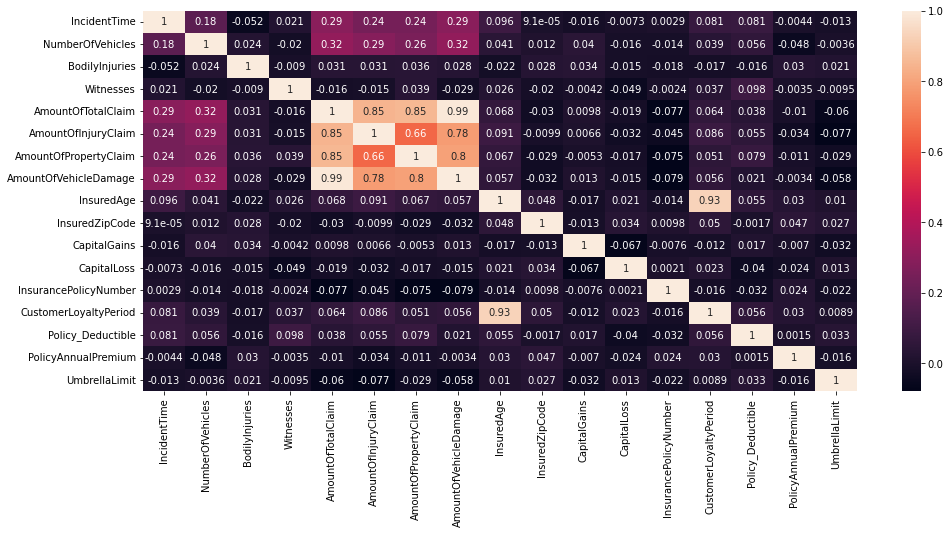

In [178]:
plt.figure(figsize = (16,7))
sns.heatmap(Merge_test.corr(),annot=True)
plt.show()

## Dealing Categorical Features 

In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
lable_encoding=LabelEncoder()
Merge_test.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles              float64
PropertyDamage                 object
BodilyInjuries                float64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfPropertyClaim         float64
AmountOfVehicleDamage         float64
InsuredAge                    float64
InsuredZipCode                float64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                  float64
CapitalLoss 

In [177]:
cat_col=Merge_test.select_dtypes(include=['category','object']).columns
cat_col

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'Country', 'DateOfPolicyCoverage',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship', 'VehicleID', 'VehicleModel', 'VehicleMake',
       'VehicleYOM'],
      dtype='object')

In [178]:
for i in cat_col:
    Merge_test[i]=lable_encoding.fit_transform(Merge_test[i])

In [179]:
Merge_test

CustomerID  DateOfIncident  TypeOfIncident  TypeOfCollission  \
0              0              35               0                 0   
1              1              12               2                 1   
2              2               4               0                 1   
3              3               2               3                 1   
4              4              52               0                 1   
...          ...             ...             ...               ...   
8907        8907              16               2                 1   
8908        8908              39               2                 0   
8909        8909              50               2                 1   
8910        8910              52               2                 2   
8911        8911              13               2                 0   

      SeverityOfIncident  AuthoritiesContacted  IncidentState  IncidentCity  \
0                      1                     0              2             1   
1                      1                     1              6             4   
2                      1                     4              2             1   
3                      3                     2              4             4   
4                      1                     4              2             1   
...                  ...                   ...            ...           ...   
8907                   2                     4              2             3   
8908                   2                     3              2             1   
8909                   1                     3              2             1   
8910                   1                     4              5             2   
8911                   2                     3              4             2   

      IncidentAddress  IncidentTime  ...  InsurancePolicyState  \
0                 311           4.0  ...                     1   
1                 337          16.0  ...                     2   
2                 931          20.0  ...                     1   
3                 400          10.0  ...                     2   
4                 826           7.0  ...                     2   
...               ...           ...  ...                   ...   
8907              864          10.0  ...                     2   
8908               32          19.0  ...                     1   
8909              937           9.0  ...                     1   
8910              992          19.0  ...                     1   
8911               22          10.0  ...                     1   

      Policy_CombinedSingleLimit  Policy_Deductible  PolicyAnnualPremium  \
0                              6             2000.0              1006.00   
1                              1              500.0              1279.17   
2                              5             1000.0              1454.67   
3                              8             2000.0              1287.76   
4                              1             2000.0              1413.14   
...                          ...                ...                  ...   
8907                           6              673.0              1104.02   
8908                           5              574.0               961.46   
8909                           1             1216.0              1560.49   
8910                           1             1950.0              1577.48   
8911                           6             2000.0               928.75   

      UmbrellaLimit  InsuredRelationship  VehicleID  VehicleModel  \
0               0.0                    3       6131            28   
1               0.0                    4       1712            34   
2         1235986.0                    2        239            19   
3         5873212.0                    5       6816            32   
4         5000000.0                    3       1637            30   
...             ...                  ...        ...           ...   
8907      1959277.0        

In [180]:
Merge_test.dtypes

CustomerID                      int32
DateOfIncident                  int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles              float64
PropertyDamage                  int32
BodilyInjuries                float64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim           float64
AmountOfPropertyClaim         float64
AmountOfVehicleDamage         float64
InsuredAge                    float64
InsuredZipCode                float64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                  float64
CapitalLoss 

## Scaling

In [181]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(Merge_test)
print(scaled)

[[-1.73185647  0.31915873 -1.11117323 ...  0.78981897  1.59051593
  -1.90130248]
 [-1.73146777 -1.04449409  0.72761162 ...  1.33920107  0.59908905
   0.16954263]
 [-1.73107907 -1.51880811 -1.11117323 ... -0.03425419  1.09480249
   0.92257721]
 ...
 [ 1.73107907  1.20849753  0.72761162 ... -0.85832734 -1.13590799
  -1.33652654]
 [ 1.73146777  1.32707604  0.72761162 ... -0.21738156  0.10337561
  -0.58349196]
 [ 1.73185647 -0.98520484  0.72761162 ... -0.67519997  1.09480249
   0.35780127]]


In [183]:
Merge_test.shape

(8912, 41)

In [184]:
for i in Merge:
    pass
for j in Merge_test:
    pass
if i!=j:
    print(i)

ReportedFraud


In [190]:
Predictions = modelRF.predict(Merge_test)

In [191]:
test=pd.read_csv('Test.csv')

In [192]:
test['ReportedFraud'] = Predictions

In [193]:
test['ReportedFraud'].value_counts()

0    5960
1    2952
Name: ReportedFraud, dtype: int64

In [195]:
test.to_csv('Predictions.csv')

In [196]:
y_test.value_counts()

0    2331
1     974
Name: ReportedFraud, dtype: int64

#       ----------------------------------Thank You ----------------------------------------------